In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint
import json
import scipy as stats
from matplotlib.patches import Patch
import statsmodels.api as sm
import sklearn
from factor_analyzer import FactorAnalyzer
import seaborn
import savReaderWriter as spss
import pyreadstat

#set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
indiaRaw_df, meta = pyreadstat.read_sav('India Post launch - final data.sav', encoding = "ISO-8859-1")


In [3]:
#drop open ends for data cleanliness 
indiaWorking_df = indiaRaw_df.drop(columns=['OE101','OE102','feedback'],axis=1)
indiaWorking_df.head()

SGID      Vdatesub   Vstatus  HV1AccountType HV3SignUpDate  \
0  307.0  1.377622e+10  Complete             1.0      4/4/2019   
1  308.0  1.377622e+10  Complete             1.0     3/23/2019   
2  309.0  1.377622e+10  Complete             2.0      4/3/2019   
3  311.0  1.377631e+10  Complete             1.0     4/20/2019   
4  314.0  1.377657e+10  Complete             1.0      4/5/2019   

   HV5DevicesUsedToStream_1  HV5DevicesUsedToStream_2  \
0                       1.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       1.0   

   HV5DevicesUsedToStream_3  HV5DevicesUsedToStream_4  \
0                       0.0                       0.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       1.0                       0.0   

   HV5DevicesUsedToStream_5  HV5DevicesUsedToStream_6  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   HV5DevicesUsedToStream_7  HV5DevicesUsedToStream_8  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   HV5DevicesUsedToStream_9  HV5DevicesUsedToStream_10  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   HV5DevicesUsedToStream_11  HV12TasteOnboardingLangPref1  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   

   HV12TasteOnboardingLangPref2  HV12TasteOnboardingLangPref3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   HV12TasteOnboardingLangPref4  HV12TasteOnboardingLangPref5  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   HV12TasteOnboardingLangPref6  HV12TasteOnboardingLangPref7  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   HV12TasteOnboardingLangPref8  HV13LangPref1  HV13LangPref2  HV13LangPref3  \
0                           0.0            0.0            0.0            0.0   
1                           0.0            0.0            0.0            1.0   
2                           0.0            0.0            0.0            1.0   
3                   

In [4]:
len(indiaWorking_df)

1286

In [5]:
#establish weighting variable for later calculation
weight=indiaWorking_df['weight'].reset_index().drop(columns={'index'})


Q9 EXPLORATION

In [6]:
q9_featureFam = indiaWorking_df.loc[:,['Q9aFeatureAwareness1_1','Q9aFeatureAwareness1_2','Q9aFeatureAwareness1_3','Q9aFeatureAwareness1_4','Q9aFeatureAwareness1_5','Q9aFeatureAwareness1_6','Q9aFeatureAwareness1_7','Q9aFeatureAwareness1_8','Q9aFeatureAwareness1_9','Q9bFeatureAwareness2_10','Q9bFeatureAwareness2_11','Q9bFeatureAwareness2_12','Q9bFeatureAwareness2_13','Q9bFeatureAwareness2_14','Q9bFeatureAwareness2_15','Q9bFeatureAwareness2_16','Q9bFeatureAwareness2_17','Q9bFeatureAwareness2_18']]
q9_featureFam.head()


Q9aFeatureAwareness1_1  Q9aFeatureAwareness1_2  Q9aFeatureAwareness1_3  \
0                     2.0                     2.0                     5.0   
1                     5.0                     4.0                     5.0   
2                     5.0                     5.0                     5.0   
3                     5.0                     5.0                     5.0   
4                     5.0                     3.0                     2.0   

   Q9aFeatureAwareness1_4  Q9aFeatureAwareness1_5  Q9aFeatureAwareness1_6  \
0                     5.0                     0.0                     0.0   
1                     4.0                     5.0                     3.0   
2                     5.0                     5.0                     5.0   
3                     5.0                     5.0                     5.0   
4                     5.0                     3.0                     5.0   

   Q9aFeatureAwareness1_7  Q9aFeatureAwareness1_8  Q9aFeatureAwareness1_9  \
0                     1.0                     5.0                     2.0   
1                     5.0                     5.0                     5.0   
2                     5.0                     5.0                     5.0   
3                     5.0                     5.0                     5.0   
4                     5.0                     5.0                     5.0   

   Q9bFeatureAwareness2_10  Q9bFeatureAwareness2_11  Q9bFeatureAwareness2_12  \
0                      4.0                      0.0                      4.0   
1                      3.0                      3.0                      5.0   
2                      5.0                      5.0                      5.0   
3                      4.0                      4.0                      5.0   
4                      0.0                      0.0                      5.0   

   Q9bFeatureAwareness2_13  Q9bFeatureAwareness2_14  Q9bFeatureAwareness2_15  \
0                      4.0                      4.0                      0.0   
1                      5.0                      5.0                      5.0   
2                      5.0                      5.0                      5.0   
3                      5.0                      5.0                      5.0   
4                      3.0                      5.0                      1.0   

   Q9bFeatureAwareness2_16  Q9bFeatureAwareness2_17  Q9bFeatureAwareness2_18  
0                      3.0                      4.0                      4.0  
1                      4.0                      4.0                      2.0  
2                      1.0                      5.0                      0.0  
3                      5.0                      5.0                      3.0  
4                      5.0                      3.0                      4.0

In [7]:
q9_featureFam = q9_featureFam.rename(columns={'Q9aFeatureAwareness1_1': 'Music recommendations',
                                             'Q9aFeatureAwareness1_2': 'Stream on any device',
                                             'Q9aFeatureAwareness1_3': 'Available for free',
                                             'Q9aFeatureAwareness1_4': 'Express my tastes',
                                             'Q9aFeatureAwareness1_5': 'Hear Bollywood hits',
                                             'Q9aFeatureAwareness1_6': 'Listen in language of choice',
                                             'Q9aFeatureAwareness1_7': 'Has playlists made for India',
                                             'Q9aFeatureAwareness1_8': 'Create playlists',
                                             'Q9aFeatureAwareness1_9': 'Radio stations',
                                             'Q9bFeatureAwareness2_10': 'Podcasts',
                                             'Q9bFeatureAwareness2_11': 'Unlimited skips',
                                             'Q9bFeatureAwareness2_12': "Listen without ads",
                                             'Q9bFeatureAwareness2_13': 'Share music',
                                             'Q9bFeatureAwareness2_14': 'Listen offline',
                                             'Q9bFeatureAwareness2_15': 'High quality audio',
                                             'Q9bFeatureAwareness2_16': 'Offers all the music I like',
                                             'Q9bFeatureAwareness2_17': 'Helps me discover new music',
                                             'Q9bFeatureAwareness2_18': "Keeps me 'in the know'"})

In [8]:
q9_featureFam = q9_featureFam.replace({1:0,2:0,3:0,4:0,5:1})


q9_featureFam=q9_featureFam.multiply(weight['weight'], axis=0)


q9_featureFamMeans=q9_featureFam.mean().reset_index()
q9_featureFamMeans=q9_featureFamMeans.rename(columns={0:'Familiarity'})
q9_featureFamMeans.sort_values('Familiarity',ascending=False)




index  Familiarity
7               Create playlists     0.723601
5   Listen in language of choice     0.715735
16   Helps me discover new music     0.683117
0          Music recommendations     0.677544
2             Available for free     0.676074
11            Listen without ads     0.671291
1           Stream on any device     0.653993
6   Has playlists made for India     0.627893
15   Offers all the music I like     0.616906
13                Listen offline     0.614563
14            High quality audio     0.599695
4            Hear Bollywood hits     0.580596
8                 Radio stations     0.548105
3              Express my tastes     0.537188
12                   Share music     0.527363
9                       Podcasts     0.482452
10               Unlimited skips     0.468623
17        Keeps me 'in the know'     0.423266

Q10 EXPLORATION

In [9]:
#weight attributes

attribute_list = indiaWorking_df.loc[:,['Q10aDrivers_1','Q10aDrivers_2','Q10aDrivers_3','Q10aDrivers_4','Q10aDrivers_5','Q10aDrivers_6','Q10aDrivers_7','Q10aDrivers_8','Q10aDrivers_9','Q10aDrivers_10','Q10aDrivers_11','Q10aDrivers_12','Q10aDrivers_13','Q10aDrivers_14','Q10aDrivers_15','Q10aDrivers_16','Q10aDrivers_17','Q10aDrivers_18','Q10aDrivers_19','Q10aDrivers_20']]
q10_indiaDrivers = indiaWorking_df.loc[:,['Q10aDrivers_1','Q10aDrivers_2','Q10aDrivers_3','Q10aDrivers_4','Q10aDrivers_5','Q10aDrivers_6','Q10aDrivers_7','Q10aDrivers_8','Q10aDrivers_9','Q10aDrivers_10','Q10aDrivers_11','Q10aDrivers_12','Q10aDrivers_13','Q10aDrivers_14','Q10aDrivers_15','Q10aDrivers_16','Q10aDrivers_17','Q10aDrivers_18','Q10aDrivers_19','Q10aDrivers_20']]

weight=indiaWorking_df['weight'].reset_index().drop(columns={'index'})

q10_indiaDrivers_weighted=attribute_list.multiply(weight['weight'], axis=0)

q10_indiaDrivers_weighted.head()


Q10aDrivers_1  Q10aDrivers_2  Q10aDrivers_3  Q10aDrivers_4  Q10aDrivers_5  \
0       0.000000       0.000000       0.860368       0.000000       0.000000   
1       0.000000       0.000000       0.000000       0.000000       0.000000   
2       0.665172       0.000000       0.665172       0.000000       0.665172   
3       0.860368       0.860368       0.860368       0.860368       0.860368   
4       0.860368       0.000000       0.000000       0.000000       0.000000   

   Q10aDrivers_6  Q10aDrivers_7  Q10aDrivers_8  Q10aDrivers_9  Q10aDrivers_10  \
0       0.000000       0.000000       0.860368       0.000000        0.000000   
1       0.000000       0.000000       0.000000       0.000000        0.000000   
2       0.000000       0.665172       0.000000       0.000000        0.000000   
3       0.860368       0.860368       0.860368       0.860368        0.860368   
4       0.000000       0.860368       0.000000       0.000000        0.000000   

   Q10aDrivers_11  Q10aDrivers_12  Q10aDrivers_13  Q10aDrivers_14  \
0             0.0             0.0        0.000000        0.860368   
1             0.0             0.0        0.000000        0.000000   
2             0.0             0.0        0.000000        0.000000   
3             0.0             0.0        0.860368        0.000000   
4             0.0             0.0        0.000000        0.000000   

   Q10aDrivers_15  Q10aDrivers_16  Q10aDrivers_17  Q10aDrivers_18  \
0        0.000000        0.860368        0.860368        0.860368   
1        0.000000        0.665172        0.000000        0.000000   
2        0.665172        0.665172        0.665172        0.000000   
3        0.000000        0.860368        0.860368        0.000000   
4        0.000000        0.860368        0.860368        0.000000   

   Q10aDrivers_19  Q10aDrivers_20  
0        0.000000             0.0  
1        0.000000             0.0  
2        0.000000             0.0  
3        0.860368             0.0  
4        0.000000             0.0

In [10]:
q10_indiaDrivers=q10_indiaDrivers.drop(columns=['Q10aDrivers_19','Q10aDrivers_20'])
q10_indiaDrivers = q10_indiaDrivers.rename(columns={'Q10aDrivers_1': 'Music recommendations',
                                             'Q10aDrivers_2': 'Stream on any device',
                                             'Q10aDrivers_3': 'Available for free',
                                             'Q10aDrivers_4': 'Express my tastes',
                                             'Q10aDrivers_5': 'Hear Bollywood hits',
                                             'Q10aDrivers_6': 'Listen in language of choice',
                                             'Q10aDrivers_7': 'Has playlists made for India',
                                             'Q10aDrivers_8': 'Create playlists',
                                             'Q10aDrivers_9': 'Radio stations',
                                             'Q10aDrivers_10': 'Podcasts',
                                             'Q10aDrivers_11': 'Unlimited skips',
                                             'Q10aDrivers_12': "Listen without ads",
                                             'Q10aDrivers_13': 'Share music',
                                             'Q10aDrivers_14': 'Listen offline',
                                             'Q10aDrivers_15': 'High quality audio',
                                             'Q10aDrivers_16': 'Offers all the music I like',
                                             'Q10aDrivers_17': 'Helps me discover new music',
                                             'Q10aDrivers_18': "Keeps me 'in the know'"})


In [11]:
q10_indiaDrivers_weighted=q10_indiaDrivers_weighted.drop(columns=['Q10aDrivers_19','Q10aDrivers_20'])
q10_indiaDrivers_weighted =q10_indiaDrivers_weighted.rename(columns={'Q10aDrivers_1': 'Music recommendations',
                                             'Q10aDrivers_2': 'Stream on any device',
                                             'Q10aDrivers_3': 'Available for free',
                                             'Q10aDrivers_4': 'Express my tastes',
                                             'Q10aDrivers_5': 'Hear Bollywood hits',
                                             'Q10aDrivers_6': 'Listen in language of choice',
                                             'Q10aDrivers_7': 'Has playlists made for India',
                                             'Q10aDrivers_8': 'Create playlists',
                                             'Q10aDrivers_9': 'Radio stations',
                                             'Q10aDrivers_10': 'Podcasts',
                                             'Q10aDrivers_11': 'Unlimited skips',
                                             'Q10aDrivers_12': "Listen without ads",
                                             'Q10aDrivers_13': 'Share music',
                                             'Q10aDrivers_14': 'Listen offline',
                                             'Q10aDrivers_15': 'High quality audio',
                                             'Q10aDrivers_16': 'Offers all the music I like',
                                             'Q10aDrivers_17': 'Helps me discover new music',
                                             'Q10aDrivers_18': "Keeps me 'in the know'"})

In [12]:
q10_indiaDrivers_weighted=q10_indiaDrivers_weighted.mean().reset_index()
q10_indiaDrivers_weighted=q10_indiaDrivers_weighted.rename(columns={0:'Drivers'})
q10_indiaDrivers_weighted.sort_values('Drivers',ascending=False)


index   Drivers
2             Available for free  0.667420
16   Helps me discover new music  0.636119
15   Offers all the music I like  0.600639
7               Create playlists  0.558384
0          Music recommendations  0.541572
5   Listen in language of choice  0.488858
1           Stream on any device  0.480685
6   Has playlists made for India  0.369992
14            High quality audio  0.362627
3              Express my tastes  0.360687
12                   Share music  0.319444
4            Hear Bollywood hits  0.316325
8                 Radio stations  0.315720
13                Listen offline  0.292361
17        Keeps me 'in the know'  0.283585
11            Listen without ads  0.273459
9                       Podcasts  0.266581
10               Unlimited skips  0.195619

In [13]:
q10_indiaDrivers.head()

Music recommendations  Stream on any device  Available for free  \
0                    0.0                   0.0                 1.0   
1                    0.0                   0.0                 0.0   
2                    1.0                   0.0                 1.0   
3                    1.0                   1.0                 1.0   
4                    1.0                   0.0                 0.0   

   Express my tastes  Hear Bollywood hits  Listen in language of choice  \
0                0.0                  0.0                           0.0   
1                0.0                  0.0                           0.0   
2                0.0                  1.0                           0.0   
3                1.0                  1.0                           1.0   
4                0.0                  0.0                           0.0   

   Has playlists made for India  Create playlists  Radio stations  Podcasts  \
0                           0.0               1.0             0.0       0.0   
1                           0.0               0.0             0.0       0.0   
2                           1.0               0.0             0.0       0.0   
3                           1.0               1.0             1.0       1.0   
4                           1.0               0.0             0.0       0.0   

   Unlimited skips  Listen without ads  Share music  Listen offline  \
0              0.0                 0.0          0.0             1.0   
1              0.0                 0.0          0.0             0.0   
2              0.0                 0.0          0.0             0.0   
3              0.0                 0.0          1.0             0.0   
4              0.0                 0.0          0.0             0.0   

   High quality audio  Offers all the music I like  \
0                 0.0                          1.0   
1                 0.0                          1.0   
2                 1.0                          1.0   
3                 0.0                          1.0   
4                 0.0                          1.0   

   Helps me discover new music  Keeps me 'in the know'  
0                          1.0                     1.0  
1                          0.0                     0.0  
2                          1.0                     0.0  
3                          1.0                     0.0  
4                          1.0                     0.0

In [14]:
q9_10_scatter = pd.merge(q10_indiaDrivers_weighted,q9_featureFamMeans, how='left', on='index')
q9_10_scatter.to_csv('Familiarity_Drivers_scatter.csv', index=True)
q9_10_scatter

index   Drivers  Familiarity
0          Music recommendations  0.541572     0.677544
1           Stream on any device  0.480685     0.653993
2             Available for free  0.667420     0.676074
3              Express my tastes  0.360687     0.537188
4            Hear Bollywood hits  0.316325     0.580596
5   Listen in language of choice  0.488858     0.715735
6   Has playlists made for India  0.369992     0.627893
7               Create playlists  0.558384     0.723601
8                 Radio stations  0.315720     0.548105
9                       Podcasts  0.266581     0.482452
10               Unlimited skips  0.195619     0.468623
11            Listen without ads  0.273459     0.671291
12                   Share music  0.319444     0.527363
13                Listen offline  0.292361     0.614563
14            High quality audio  0.362627     0.599695
15   Offers all the music I like  0.600639     0.616906
16   Helps me discover new music  0.636119     0.683117
17        Keeps me 'in the know'  0.283585     0.423266

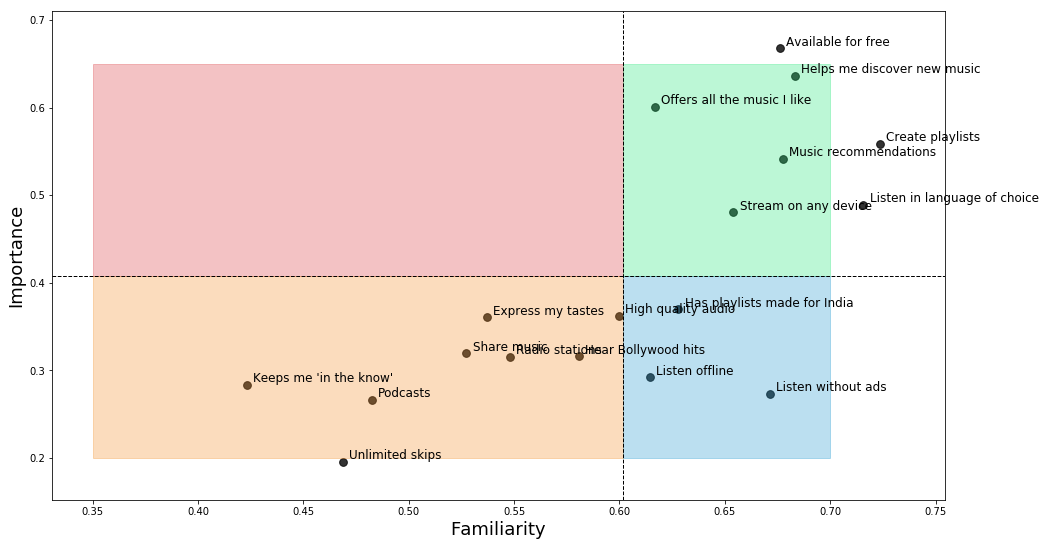

In [15]:
# build scatter plot with labels
y = q9_10_scatter['Drivers']
z = q9_10_scatter['Familiarity']
n = q9_10_scatter['index']

#set mean values for colors
mean_drivers = q9_10_scatter['Drivers'].mean()
mean_fam = q9_10_scatter['Familiarity'].mean()

#set point for horizontal and vertical line quadrants
T_Cutoff = mean_fam
V_Cutoff = mean_drivers
#plots and data labels with a loop
fig, ax = plt.subplots()
ax.scatter(z, y,s=60, c='black',alpha=0.8)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.003, y[i]+.003), fontsize=12)

#plot graphics    
plt.xlabel('Familiarity',fontsize=18)
plt.ylabel('Importance',fontsize=18)
plt.gcf().set_size_inches(16,9)
ax.axvline(T_Cutoff,color = 'black',linestyle='dashed',lw=1)
ax.axhline(V_Cutoff,color = 'black',linestyle='dashed',lw=1)

#quadrant fill
ax.fill_between([.35, T_Cutoff],0.65,V_Cutoff,alpha=0.3, color='#DA383D')  # orange
ax.fill_between([T_Cutoff, .7], 0.65, V_Cutoff, alpha=0.3, color='#24e679')  # blue
ax.fill_between([.35, T_Cutoff], V_Cutoff, .2, alpha=0.3, color='#F38D25')  # red
ax.fill_between([T_Cutoff, .7], V_Cutoff, .2, alpha=0.3, color='#1F98D0') #green

#save the outfile
plt.savefig('Familiarity_Drivers_scatter.png', transparent=False,dpi=300)

Q11 EXPLORATION

In [16]:
# isolate Q11 and replace '99' as missing values with nAn
q11_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q11aSatisfactionSignUpActivation','Q11bSatisfactionSignUpAttributes_1','Q11bSatisfactionSignUpAttributes_2','Q11bSatisfactionSignUpAttributes_3','Q11bSatisfactionSignUpAttributes_4','Q11bSatisfactionSignUpAttributes_5','Q11bSatisfactionSignUpAttributes_6','Q11bSatisfactionSignUpAttributes_7','Q11bSatisfactionSignUpAttributes_8','Q11bSatisfactionSignUpAttributes_9','Q11bSatisfactionSignUpAttributes_10']]
q11_indiaDrivers = q11_indiaDrivers.replace(99.0, np.NaN)
q11_indiaDrivers.head()

active_days_last_7d active_days_last_30d minutes_played  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   Q11aSatisfactionSignUpActivation  Q11bSatisfactionSignUpAttributes_1  \
0                               3.0                                 5.0   
1                               5.0                                 5.0   
2                               2.0                                 4.0   
3                               4.0                                 5.0   
4                               4.0                                 5.0   

   Q11bSatisfactionSignUpAttributes_2  Q11bSatisfactionSignUpAttributes_3  \
0                                 4.0                                 4.0   
1                                 3.0                                 4.0   
2                                 4.0                                 2.0   
3                                 5.0                                 5.0   
4                                 5.0                                 4.0   

   Q11bSatisfactionSignUpAttributes_4  Q11bSatisfactionSignUpAttributes_5  \
0                                 4.0                                 NaN   
1                                 4.0                                 5.0   
2                                 4.0                                 4.0   
3                                 5.0                                 5.0   
4                                 5.0                                 NaN   

   Q11bSatisfactionSignUpAttributes_6  Q11bSatisfactionSignUpAttributes_7  \
0                                 4.0                                 4.0   
1                                 5.0                                 5.0   
2                                 4.0                                 4.0   
3                                 4.0                                 4.0   
4                                 5.0                                 5.0   

   Q11bSatisfactionSignUpAttributes_8  Q11bSatisfactionSignUpAttributes_9  \
0                                 4.0                                 NaN   
1                                 5.0                                 5.0   
2                                 4.0                                 4.0   
3                                 5.0                                 4.0   
4                                 4.0                                 NaN   

   Q11bSatisfactionSignUpAttributes_10  
0                                  4.0  
1                                  5.0  
2                                  4.0  
3                                  5.0  
4                                  3.0

In [17]:
q11_indiaDrivers = q11_indiaDrivers.rename(columns={'Q11aSatisfactionSignUpActivation': 'Overall sign-up satisfaction',
                                             'Q11bSatisfactionSignUpAttributes_1': 'Downloading the app',
                                             'Q11bSatisfactionSignUpAttributes_2': 'Music language preferences',
                                             'Q11bSatisfactionSignUpAttributes_3': 'Relevance of artist list',
                                             'Q11bSatisfactionSignUpAttributes_4': 'Search - Finding artists',
                                             'Q11bSatisfactionSignUpAttributes_5': 'Creating account w/ Facebook',
                                             'Q11bSatisfactionSignUpAttributes_6': 'Creating account w/ email',
                                             'Q11bSatisfactionSignUpAttributes_7': 'Ease of navigation',
                                             'Q11bSatisfactionSignUpAttributes_8': 'Visual appearance of UI',
                                             'Q11bSatisfactionSignUpAttributes_9': 'Customer service and support',
                                             'Q11bSatisfactionSignUpAttributes_10': 'Time spent to setup',
                                             'Q11bSatisfactionSignUpAttributes_11': "Entering payment information"})

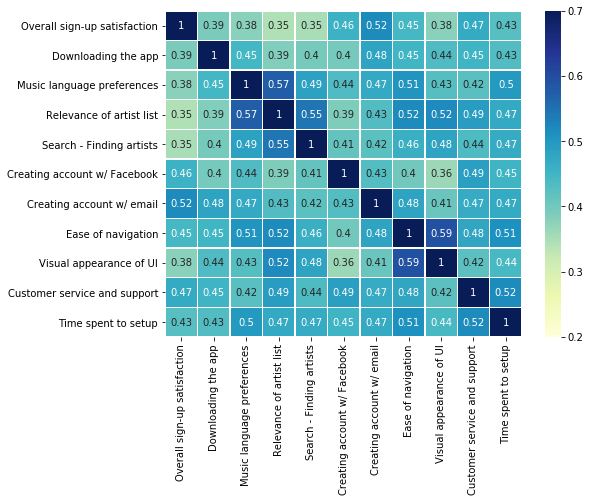

In [18]:
# correlation heatmap for Q11
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

q11_corr = q11_indiaDrivers.corr()
seaborn.heatmap(q11_corr, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=q11_corr.columns,yticklabels=q11_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(8,6)

In [19]:
q11_corr.to_csv('Q11_correlations.csv', index=True)
q11_corr

Overall sign-up satisfaction  \
Overall sign-up satisfaction                      1.000000   
Downloading the app                               0.391977   
Music language preferences                        0.378454   
Relevance of artist list                          0.345617   
Search - Finding artists                          0.351147   
Creating account w/ Facebook                      0.456107   
Creating account w/ email                         0.518704   
Ease of navigation                                0.445227   
Visual appearance of UI                           0.378954   
Customer service and support                      0.470824   
Time spent to setup                               0.426721   

                              Downloading the app  Music language preferences  \
Overall sign-up satisfaction             0.391977                    0.378454   
Downloading the app                      1.000000                    0.446466   
Music language preferences               0.446466                    1.000000   
Relevance of artist list                 0.386794                    0.573838   
Search - Finding artists                 0.396172                    0.486703   
Creating account w/ Facebook             0.397888                    0.435261   
Creating account w/ email                0.482922                    0.472686   
Ease of navigation                       0.451725                    0.505042   
Visual appearance of UI                  0.436083                    0.429586   
Customer service and support             0.451995                    0.424811   
Time spent to setup                      0.433061                    0.497112   

                              Relevance of artist list  \
Overall sign-up satisfaction                  0.345617   
Downloading the app                           0.386794   
Music language preferences                    0.573838   
Relevance of artist list                      1.000000   
Search - Finding artists                      0.546232   
Creating account w/ Facebook                  0.389051   
Creating account w/ email                     0.432536   
Ease of navigation                            0.519532   
Visual appearance of UI                       0.521492   
Customer service and support                  0.491405   
Time spent to setup                           0.473158   

                              Search - Finding artists  \
Overall sign-up satisfaction                  0.351147   
Downloading the app                           0.396172   
Music language preferences                    0.486703   
Relevance of artist list                      0.546232   
Search - Finding artists                      1.000000   
Creating account w/ Facebook                  0.413662   
Creating account w/ email                     0.424093   
Ease of navigation                            0.461782   
Visual appearance of UI                       0.481942   
Customer service and support                  0.437322   
Time spent to setup                           0.468188   

                              Creating account w/ Facebook  \
Overall sign-up satisfaction                      0.456107   
Downloading the app                               0.397888   
Music language preferences                        0.435261   
Relevance of artist list                          0.389051   
Search - Finding artists                          0.413662   
Creating account w/ Facebook                      1.000000   
Creating account w/ email                         0.432023   
Ease of navigation                                0.400866   
Visual appearance of UI                           0.363621   
Customer service and support                      0.488074   
Time spent to setup                               0.453691   

                              Creating account w/ email  Ease of navigation  \
Overall sign-up satisfaction                   0.518704            0.445227   
Downloading the

In [20]:
# convert 1st party data string to numeric
q11_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q11_indiaDrivers['active_days_last_30d'], errors='coerce')
q11_indiaDrivers['active_days_last_7d'] = pd.to_numeric(q11_indiaDrivers['active_days_last_7d'], errors='coerce')
q11_indiaDrivers['minutes_played'] = pd.to_numeric(q11_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
q11_indiaDrivers_Behavioral = q11_indiaDrivers.loc[(q11_indiaDrivers['active_days_last_30d']>0)]
q11_indiaDrivers_Behavioral.head()
q11_indiaDrivers_Behavioral.to_csv('Q11_indiaDrivers_Behavioral.csv', index=True)

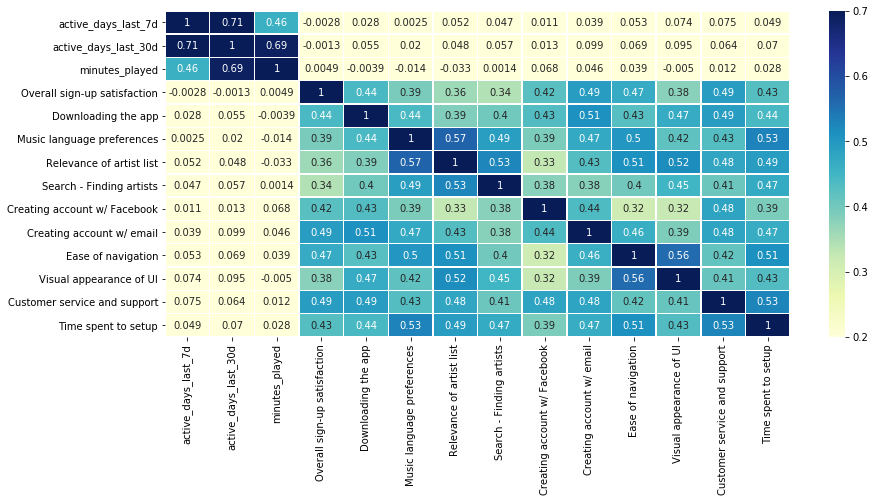

In [21]:
# q11 correlation matrix with 1st party data
corr_2 = q11_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(14,6)

In [22]:
#Q11 linear regression model

q11_indiaDrivers_Cleaned = q11_indiaDrivers[q11_indiaDrivers.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X = q11_indiaDrivers_Cleaned[['Downloading the app','Music language preferences','Relevance of artist list','Search - Finding artists','Creating account w/ Facebook','Creating account w/ email','Ease of navigation','Visual appearance of UI','Customer service and support','Time spent to setup']]
y = q11_indiaDrivers_Cleaned["Overall sign-up satisfaction"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Overall sign-up satisfaction   R-squared:                       0.375
Model:                                      OLS   Adj. R-squared:                  0.362
Method:                           Least Squares   F-statistic:                     28.00
Date:                          Tue, 23 Jul 2019   Prob (F-statistic):           6.35e-42
Time:                                  20:02:28   Log-Likelihood:                -386.07
No. Observations:                           477   AIC:                             794.1
Df Residuals:                               466   BIC:                             840.0
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.3034      0.230      5.669      0.000       0.852       1.755
Downloading the app              0.0338      0.057      0.589      0.556      -0.079       0.146
Music language preferences      -0.0256      0.054     -0.476      0.634      -0.131       0.080
Relevance of artist list        -0.0482      0.047     -1.032      0.303      -0.140       0.044
Search - Finding artists         0.0359      0.040      0.901      0.368      -0.042       0.114
Creating account w/ Facebook     0.0994      0.031      3.164      0.002       0.038       0.161
Creating account w/ email        0.1258      0.048      2.629      0.009       0.032       0.220
Ease of navigation               0.2120      0.046      4.632      0.000       0.122       0.302
Visual appearance of UI          0.0448      0.046      0.968      0.333      -0.046       0.136
Customer service and support     0.1660      0.042      3.959      0.000       0.084       0.248
Time spent to setup              0.0633      0.047      1.338      0.181      -0.030       0.156
==============================================================================
Omnibus:                       70.928   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.961
Skew:                          -0.837   Prob(JB):                     4.05e-31
Kurtosis:                       5.059   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#re-run model and export to csv 
model = sm.OLS(y, X)
results = model.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
q11_model = pd.read_html(results_as_html, header=0, index_col=0)[0]
q11_model.to_csv('q11_model.csv', index=True)
q11_model

coef  std err      t  P>|t|  [0.025  0.975]
const                         1.3034    0.230  5.669  0.000   0.852   1.755
Downloading the app           0.0338    0.057  0.589  0.556  -0.079   0.146
Music language preferences   -0.0256    0.054 -0.476  0.634  -0.131   0.080
Relevance of artist list     -0.0482    0.047 -1.032  0.303  -0.140   0.044
Search - Finding artists      0.0359    0.040  0.901  0.368  -0.042   0.114
Creating account w/ Facebook  0.0994    0.031  3.164  0.002   0.038   0.161
Creating account w/ email     0.1258    0.048  2.629  0.009   0.032   0.220
Ease of navigation            0.2120    0.046  4.632  0.000   0.122   0.302
Visual appearance of UI       0.0448    0.046  0.968  0.333  -0.046   0.136
Customer service and support  0.1660    0.042  3.959  0.000   0.084   0.248
Time spent to setup           0.0633    0.047  1.338  0.181  -0.030   0.156

In [24]:
# create coefficients table for merging with means and creating scatterplot
q11_coefficients = q11_model.iloc[1:,0].reset_index()

# generate q11 means for scatterplot
q11_means = q11_indiaDrivers.mean().reset_index()
q11_means = q11_means.iloc[4:]
q11_means = q11_means.rename(columns={0:'mean'})


In [25]:
q11_binary = q11_indiaDrivers.replace({1:0,2:0,3:0,4:0,5:1})

q11_binary=q11_binary.multiply(weight['weight'], axis=0)

q11_binary_means = q11_binary.mean().reset_index()
q11_binary_means = q11_binary_means.iloc[4:]
q11_binary_means = q11_binary_means.rename(columns={0:'top_box'})
q11_binary_means

index   top_box
4            Downloading the app  0.678469
5     Music language preferences  0.613491
6       Relevance of artist list  0.549626
7       Search - Finding artists  0.592926
8   Creating account w/ Facebook  0.469246
9      Creating account w/ email  0.633305
10            Ease of navigation  0.567033
11       Visual appearance of UI  0.644605
12  Customer service and support  0.494257
13           Time spent to setup  0.511746

In [26]:
q11_scatter = pd.merge(q11_coefficients,q11_binary_means, how='left', on='index')
q11_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q11_indiaDrivers['active_days_last_30d'], errors='coerce')
q11_scatter.to_csv('q11_sign-up_scatter.csv', index=True)
q11_scatter

index    coef   top_box
0           Downloading the app  0.0338  0.678469
1    Music language preferences -0.0256  0.613491
2      Relevance of artist list -0.0482  0.549626
3      Search - Finding artists  0.0359  0.592926
4  Creating account w/ Facebook  0.0994  0.469246
5     Creating account w/ email  0.1258  0.633305
6            Ease of navigation  0.2120  0.567033
7       Visual appearance of UI  0.0448  0.644605
8  Customer service and support  0.1660  0.494257
9           Time spent to setup  0.0633  0.511746

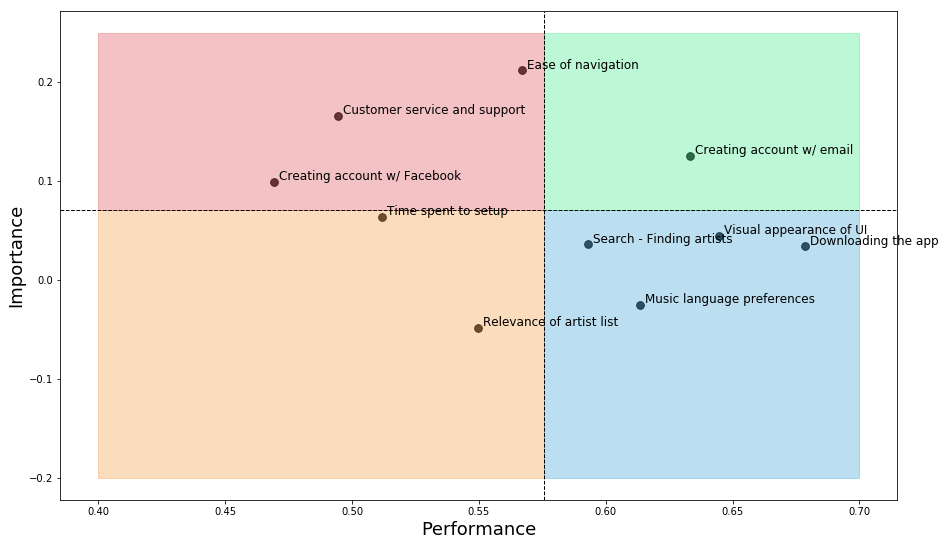

In [27]:
# build scatter plot with labels
y = q11_scatter['coef']
z = q11_scatter['top_box']
n = q11_scatter['index']

#set mean values for colors
mean_coef = q11_scatter['coef'].mean()
mean_top_box = q11_scatter['top_box'].mean()

#set point for horizontal and vertical line quadrants
T_Cutoff = mean_top_box
V_Cutoff = mean_coef

#plots and data labels with a loop
fig, ax = plt.subplots()
ax.scatter(z, y,s=60, c='black',alpha=0.8)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.002, y[i]+.002), fontsize=12)

#plot graphics    
plt.xlabel('Performance',fontsize=18)
plt.ylabel('Importance',fontsize=18)
plt.gcf().set_size_inches(15,9)
ax.axvline(T_Cutoff,color = 'black',linestyle='dashed',lw=1)
ax.axhline(V_Cutoff,color = 'black',linestyle='dashed',lw=1)

#quadrant fill
ax.fill_between([.4, T_Cutoff],-0.2,V_Cutoff,alpha=0.3, color='#F38D25')  # orange
ax.fill_between([T_Cutoff, .7], -0.2, V_Cutoff, alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([.4, T_Cutoff], V_Cutoff, .25, alpha=0.3, color='#DA383D')  # red
ax.fill_between([T_Cutoff, .7], V_Cutoff, .25, alpha=0.3, color='#24e679') #green

#save the outfile
plt.savefig('q11_sign_up_drivers.png', transparent=False,dpi=300)


q12 Exploration

In [28]:
# isolate Q12 and replace '99' as missing values with nAn
q12_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q12aSatisfactionHomeScreen','Q12bSatisfactionHomeScreenAttributes_1','Q12bSatisfactionHomeScreenAttributes_2','Q12bSatisfactionHomeScreenAttributes_3','Q12bSatisfactionHomeScreenAttributes_4','Q12bSatisfactionHomeScreenAttributes_5','Q12bSatisfactionHomeScreenAttributes_6','Q12bSatisfactionHomeScreenAttributes_7','Q12bSatisfactionHomeScreenAttributes_8','Q12bSatisfactionHomeScreenAttributes_9','Q12bSatisfactionHomeScreenAttributes_10', 'Q12bSatisfactionHomeScreenAttributes_11','Q12bSatisfactionHomeScreenAttributes_12']]
q12_indiaDrivers = q12_indiaDrivers.replace(99.0, np.NaN)
q12_indiaDrivers.head()

active_days_last_7d active_days_last_30d minutes_played  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   Q12aSatisfactionHomeScreen  Q12bSatisfactionHomeScreenAttributes_1  \
0                         4.0                                     4.0   
1                         4.0                                     4.0   
2                         2.0                                     4.0   
3                         4.0                                     5.0   
4                         3.0                                     3.0   

   Q12bSatisfactionHomeScreenAttributes_2  \
0                                     3.0   
1                                     5.0   
2                                     4.0   
3                                     5.0   
4                                     3.0   

   Q12bSatisfactionHomeScreenAttributes_3  \
0                                     5.0   
1                                     4.0   
2                                     5.0   
3                                     5.0   
4                                     5.0   

   Q12bSatisfactionHomeScreenAttributes_4  \
0                                     5.0   
1                                     3.0   
2                                     2.0   
3                                     5.0   
4                                     5.0   

   Q12bSatisfactionHomeScreenAttributes_5  \
0                                     3.0   
1                                     4.0   
2                                     4.0   
3                                     5.0   
4                                     NaN   

   Q12bSatisfactionHomeScreenAttributes_6  \
0                                     4.0   
1                                     3.0   
2                                     2.0   
3                                     5.0   
4                                     4.0   

   Q12bSatisfactionHomeScreenAttributes_7  \
0                                     NaN   
1                                     3.0   
2                                     2.0   
3                                     5.0   
4                                     3.0   

   Q12bSatisfactionHomeScreenAttributes_8  \
0                                     4.0   
1                                     4.0   
2                                     4.0   
3                                     5.0   
4                                     3.0   

   Q12bSatisfactionHomeScreenAttributes_9  \
0                                     4.0   
1                                     4.0   
2                                     4.0   
3                                     5.0   
4                                     4.0   

   Q12bSatisfactionHomeScreenAttributes_10  \
0                                      5.0   
1                                      4.0   
2                                      5.0   
3                                      4.0   
4                                      3.0   

   Q12bSatisfactionHomeScreenAttributes_11  \
0                                      4.0   
1                                      3.0   
2                                      4.0   
3                                      4.0   
4                                      2.0   

   Q12bSatisfactionHomeScreenAttributes_12  
0                                      4.0  
1                                      5.0  
2                                      3.0  
3                                      5.0  
4                                      4.0

In [29]:
q12_indiaDrivers = q12_indiaDrivers.rename(columns={'Q12aSatisfactionHomeScreen': 'Overall home screen satisfaction',
                                             'Q12bSatisfactionHomeScreenAttributes_1': 'Ease of navigation',
                                             'Q12bSatisfactionHomeScreenAttributes_2': 'Ease of logging in',
                                             'Q12bSatisfactionHomeScreenAttributes_3': 'Performance',
                                             'Q12bSatisfactionHomeScreenAttributes_4': 'Ease of finding artists',
                                             'Q12bSatisfactionHomeScreenAttributes_5': 'Relevance of personalized recommendations',
                                             'Q12bSatisfactionHomeScreenAttributes_6': 'Relevance of music in languages you prefer',
                                             'Q12bSatisfactionHomeScreenAttributes_7': 'Music availability across languages',
                                             'Q12bSatisfactionHomeScreenAttributes_8': 'Ability to see what music is popular',
                                             'Q12bSatisfactionHomeScreenAttributes_9': 'Relevance of albums displayed',
                                             'Q12bSatisfactionHomeScreenAttributes_10': 'Visual appearance of the UI',
                                             'Q12bSatisfactionHomeScreenAttributes_11': "Frequency home screen reco's get updated",
                                             'Q12bSatisfactionHomeScreenAttributes_12': 'Ease of listening to music you already listened to'})



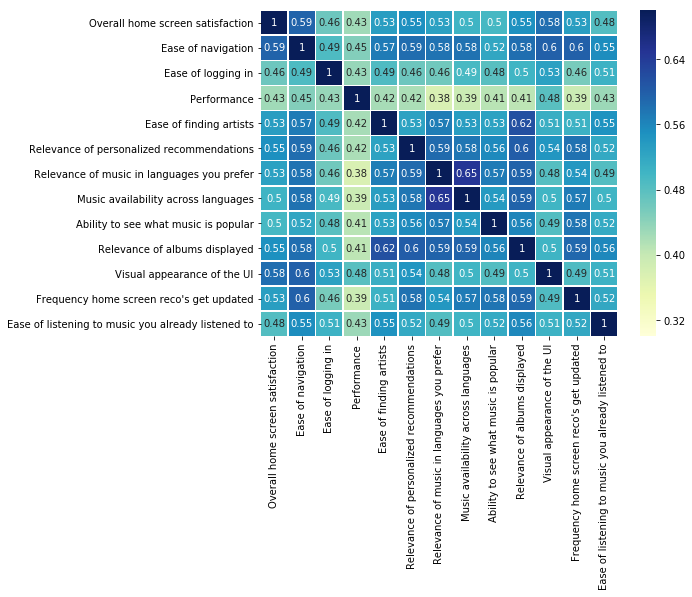

In [30]:
# correlation heatmap for Q12
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

q12_corr = q12_indiaDrivers.corr()
seaborn.heatmap(q12_corr, cmap="YlGnBu",vmin=.3, vmax=.7,annot=True,xticklabels=q12_corr.columns,yticklabels=q12_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(8,6)

In [31]:
q12_corr.to_csv('Q12_correlations.csv', index=True)
q12_corr

Overall home screen satisfaction  \
Overall home screen satisfaction                                            1.000000   
Ease of navigation                                                          0.594876   
Ease of logging in                                                          0.464406   
Performance                                                                 0.427512   
Ease of finding artists                                                     0.532883   
Relevance of personalized recommendations                                   0.550769   
Relevance of music in languages you prefer                                  0.528675   
Music availability across languages                                         0.502203   
Ability to see what music is popular                                        0.496212   
Relevance of albums displayed                                               0.549015   
Visual appearance of the UI                                                 0.583547   
Frequency home screen reco's get updated                                    0.532607   
Ease of listening to music you already listened to                          0.484404   

                                                    Ease of navigation  \
Overall home screen satisfaction                              0.594876   
Ease of navigation                                            1.000000   
Ease of logging in                                            0.489331   
Performance                                                   0.447262   
Ease of finding artists                                       0.571769   
Relevance of personalized recommendations                     0.585096   
Relevance of music in languages you prefer                    0.578504   
Music availability across languages                           0.580705   
Ability to see what music is popular                          0.520471   
Relevance of albums displayed                                 0.584159   
Visual appearance of the UI                                   0.598081   
Frequency home screen reco's get updated                      0.597749   
Ease of listening to music you already listened to            0.554488   

                                                    Ease of logging in  \
Overall home screen satisfaction                              0.464406   
Ease of navigation                                            0.489331   
Ease of logging in                                            1.000000   
Performance                                                   0.434248   
Ease of finding artists                                       0.487933   
Relevance of personalized recommendations                     0.464502   
Relevance of music in languages you prefer                    0.461842   
Music availability across languages                           0.493757   
Ability to see what music is popular                          0.480837   
Relevance of albums displayed                                 0.500227   
Visual appearance of the UI                                   0.528597   
Frequency home screen reco's get updated                      0.455888   
Ease of listening to music you already listened to            0.505262   

                                                    Performance  \
Overall home screen satisfaction                       0.427512   
Ease of navigation                                     0.447262   
Ease of logging in                                     0.434248   
Performance                                            1.000000   
Ease of finding artists                                0.423241   
Relevance of personalized recommendations              0.419262   
Relevance of music in languages you prefer             0.377722   
Music availability across languages                    0.394433   
Ability to see what music is popular                   0.410090   
Relevance of albums displayed                          0.407674   
Visual a

In [32]:
# convert 1st party data string to numeric
q12_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q12_indiaDrivers['active_days_last_30d'], errors='coerce')
q12_indiaDrivers['active_days_last_7d'] = pd.to_numeric(q12_indiaDrivers['active_days_last_7d'], errors='coerce')
q12_indiaDrivers['minutes_played'] = pd.to_numeric(q12_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
q12_indiaDrivers_Behavioral = q12_indiaDrivers.loc[(q12_indiaDrivers['active_days_last_30d']>0)]
q12_indiaDrivers_Behavioral.head()

active_days_last_7d  active_days_last_30d  minutes_played  \
339                  5.0                  12.0      665.004883   
340                  0.0                   7.0       82.517350   
341                  2.0                   7.0       92.374517   
342                  6.0                  12.0     1486.898283   
343                  5.0                  18.0     1097.007550   

     Overall home screen satisfaction  Ease of navigation  Ease of logging in  \
339                               5.0                 4.0                 5.0   
340                               5.0                 5.0                 5.0   
341                               5.0                 4.0                 4.0   
342                               5.0                 5.0                 3.0   
343                               4.0                 4.0                 4.0   

     Performance  Ease of finding artists  \
339          5.0                      5.0   
340          5.0                      5.0   
341          4.0                      4.0   
342          5.0                      5.0   
343          4.0                      4.0   

     Relevance of personalized recommendations  \
339                                        4.0   
340                                        5.0   
341                                        5.0   
342                                        5.0   
343                                        4.0   

     Relevance of music in languages you prefer  \
339                                         3.0   
340                                         5.0   
341                                         4.0   
342                                         5.0   
343                                         4.0   

     Music availability across languages  \
339                                  5.0   
340                                  5.0   
341                                  3.0   
342                                  5.0   
343                                  4.0   

     Ability to see what music is popular  Relevance of albums displayed  \
339                                   5.0                            5.0   
340                                   5.0                            5.0   
341                                   4.0                            5.0   
342                                   5.0                            5.0   
343                                   4.0                            4.0   

     Visual appearance of the UI  Frequency home screen reco's get updated  \
339                          4.0                                       5.0   
340                          5.0                                       5.0   
341                          4.0                                       5.0   
342                          5.0                                       5.0   
343                          4.0                                       4.0   

     Ease of listening to music you already listened to  
339                                                5.0   
340                                                5.0   
341                                                4.0   
342                                                5.0   
343                                                4.0

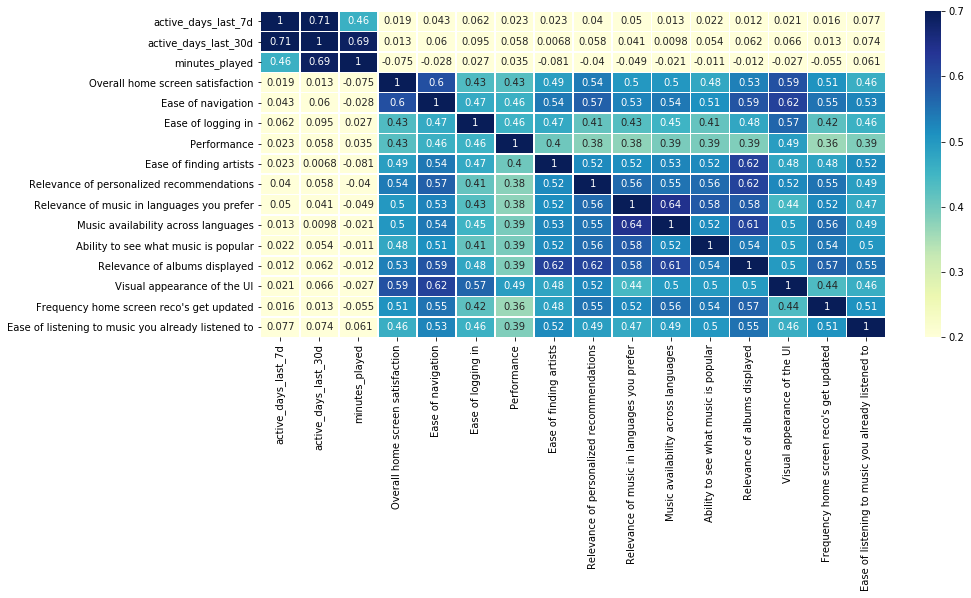

In [33]:
# q12 correlation matrix with 1st party data
corr_2 = q12_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(14,6)

In [34]:
#Q12 linear regression model

q12_indiaDrivers_Cleaned = q12_indiaDrivers[q12_indiaDrivers.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X = q12_indiaDrivers_Cleaned[['Ease of navigation','Ease of logging in','Performance','Ease of finding artists','Relevance of personalized recommendations','Relevance of music in languages you prefer','Music availability across languages','Ability to see what music is popular','Relevance of albums displayed','Visual appearance of the UI',"Frequency home screen reco's get updated",'Ease of listening to music you already listened to']]
y = q12_indiaDrivers_Cleaned['Overall home screen satisfaction']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Overall home screen satisfaction   R-squared:                       0.513
Model:                                          OLS   Adj. R-squared:                  0.505
Method:                               Least Squares   F-statistic:                     62.87
Date:                              Tue, 23 Jul 2019   Prob (F-statistic):          2.16e-103
Time:                                      20:02:31   Log-Likelihood:                -633.71
No. Observations:                               730   AIC:                             1293.
Df Residuals:                                   717   BIC:                             1353.
Df Model:                                        12                                         
Covariance Type:                          nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  0.1939      0.173      1.120      0.263      -0.146       0.534
Ease of navigation                                     0.1604      0.042      3.842      0.000       0.078       0.242
Ease of logging in                                     0.0463      0.041      1.137      0.256      -0.034       0.126
Performance                                            0.0311      0.033      0.937      0.349      -0.034       0.096
Ease of finding artists                                0.0191      0.038      0.498      0.618      -0.056       0.095
Relevance of personalized recommendations              0.0686      0.039      1.777      0.076      -0.007       0.144
Relevance of music in languages you prefer             0.0549      0.039      1.394      0.164      -0.022       0.132
Music availability across languages                   -0.0089      0.036     -0.248      0.804      -0.080       0.062
Ability to see what music is popular                   0.0317      0.037      0.849      0.396      -0.042       0.105
Relevance of albums displayed                          0.1490      0.040      3.737      0.000       0.071       0.227
Visual appearance of the UI                            0.2551      0.039      6.566      0.000       0.179       0.331
Frequency home screen reco's get updated               0.1191      0.034      3.478      0.001       0.052       0.186
Ease of listening to music you already listened to     0.0092      0.039      0.234      0.815      -0.068       0.087
==============================================================================
Omnibus:                       70.969   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.417
Skew:                          -0.682   Prob(JB):                     1.06e-24
Kurtosis:                       4.331   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#re-run model and export to csv 
model = sm.OLS(y, X)
results = model.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
q12_model = pd.read_html(results_as_html, header=0, index_col=0)[0]
q12_model.to_csv('q12_model.csv', index=True)
q12_model

coef  std err      t  \
const                                               0.1939    0.173  1.120   
Ease of navigation                                  0.1604    0.042  3.842   
Ease of logging in                                  0.0463    0.041  1.137   
Performance                                         0.0311    0.033  0.937   
Ease of finding artists                             0.0191    0.038  0.498   
Relevance of personalized recommendations           0.0686    0.039  1.777   
Relevance of music in languages you prefer          0.0549    0.039  1.394   
Music availability across languages                -0.0089    0.036 -0.248   
Ability to see what music is popular                0.0317    0.037  0.849   
Relevance of albums displayed                       0.1490    0.040  3.737   
Visual appearance of the UI                         0.2551    0.039  6.566   
Frequency home screen reco's get updated            0.1191    0.034  3.478   
Ease of listening to music you already listened to  0.0092    0.039  0.234   

                                                    P>|t|  [0.025  0.975]  
const                                               0.263  -0.146   0.534  
Ease of navigation                                  0.000   0.078   0.242  
Ease of logging in                                  0.256  -0.034   0.126  
Performance                                         0.349  -0.034   0.096  
Ease of finding artists                             0.618  -0.056   0.095  
Relevance of personalized recommendations           0.076  -0.007   0.144  
Relevance of music in languages you prefer          0.164  -0.022   0.132  
Music availability across languages                 0.804  -0.080   0.062  
Ability to see what music is popular                0.396  -0.042   0.105  
Relevance of albums displayed                       0.000   0.071   0.227  
Visual appearance of the UI                         0.000   0.179   0.331  
Frequency home screen reco's get updated            0.001   0.052   0.186  
Ease of listening to music you already listened to  0.815  -0.068   0.087

In [36]:
# create coefficients table for merging with means and creating scatterplot
q12_coefficients = q12_model.iloc[1:,0].reset_index()

# generate q12 means for scatterplot
q12_means = q12_indiaDrivers.mean().reset_index()
q12_means = q12_means.iloc[4:]
q12_means = q12_means.rename(columns={0:'mean'})

In [37]:
q12_binary = q12_indiaDrivers.replace({1:0,2:0,3:0,4:0,5:1})

q12_binary=q12_binary.multiply(weight['weight'], axis=0)


q12_binary_means = q12_binary.mean().reset_index()
q12_binary_means = q12_binary_means.iloc[4:]
q12_binary_means = q12_binary_means.rename(columns={0:'top_box'})
q12_binary_means

index   top_box
4                                  Ease of navigation  0.540775
5                                  Ease of logging in  0.603779
6                                         Performance  0.552132
7                             Ease of finding artists  0.560604
8           Relevance of personalized recommendations  0.518954
9          Relevance of music in languages you prefer  0.539644
10                Music availability across languages  0.477007
11               Ability to see what music is popular  0.550626
12                      Relevance of albums displayed  0.477937
13                        Visual appearance of the UI  0.602180
14           Frequency home screen reco's get updated  0.476086
15  Ease of listening to music you already listene...  0.585268

In [38]:
q12_scatter = pd.merge(q12_coefficients,q12_binary_means, how='left', on='index')
q12_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q12_indiaDrivers['active_days_last_30d'], errors='coerce')
q12_scatter.to_csv('q12_home_screen_scatter.csv', index=True)

q12_scatter

index    coef   top_box
0                                  Ease of navigation  0.1604  0.540775
1                                  Ease of logging in  0.0463  0.603779
2                                         Performance  0.0311  0.552132
3                             Ease of finding artists  0.0191  0.560604
4           Relevance of personalized recommendations  0.0686  0.518954
5          Relevance of music in languages you prefer  0.0549  0.539644
6                 Music availability across languages -0.0089  0.477007
7                Ability to see what music is popular  0.0317  0.550626
8                       Relevance of albums displayed  0.1490  0.477937
9                         Visual appearance of the UI  0.2551  0.602180
10           Frequency home screen reco's get updated  0.1191  0.476086
11  Ease of listening to music you already listene...  0.0092  0.585268

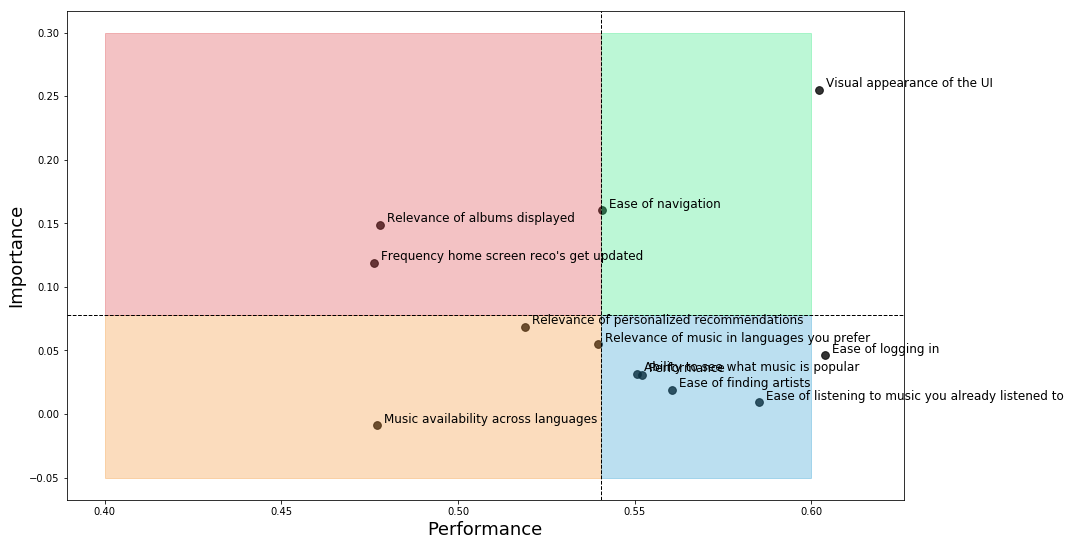

In [39]:
# build scatter plot with labels
y = q12_scatter['coef']
z = q12_scatter['top_box']
n = q12_scatter['index']

#set mean values for colors
mean_coef = q12_scatter['coef'].mean()
mean_top_box = q12_scatter['top_box'].mean()

#set point for horizontal and vertical line quadrants
T_Cutoff = mean_top_box
V_Cutoff = mean_coef

#plots and data labels with a loop
fig, ax = plt.subplots()
ax.scatter(z, y,s=60, c='black',alpha=0.8)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.002, y[i]+.002), fontsize=12)

#plot graphics    
plt.xlabel('Performance',fontsize=18)
plt.ylabel('Importance',fontsize=18)
plt.gcf().set_size_inches(15,9)
ax.axvline(T_Cutoff,color = 'black',linestyle='dashed',lw=1)
ax.axhline(V_Cutoff,color = 'black',linestyle='dashed',lw=1)

#quadrant fill
ax.fill_between([.4, T_Cutoff],-0.05,V_Cutoff,alpha=0.3, color='#F38D25')  # orange
ax.fill_between([T_Cutoff, .6], -0.05, V_Cutoff, alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([.4, T_Cutoff], V_Cutoff, .3, alpha=0.3, color='#DA383D')  # red
ax.fill_between([T_Cutoff, .6], V_Cutoff, .3, alpha=0.3, color='#24e679') #green

#save the outfile
plt.savefig('q12_home_screen_drivers.png', transparent=False,dpi=300)


q13 Exploration

In [40]:
# isolate Q13 and replace '99' as missing values with nAn
q13_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q13aSatisfactionContent','Q13b1SatisfactionContent1_1','Q13b1SatisfactionContent1_2','Q13b1SatisfactionContent1_3','Q13b1SatisfactionContent1_4','Q13b1SatisfactionContent1_5','Q13b1SatisfactionContent1_6','Q13b1SatisfactionContent1_7','Q13b1SatisfactionContent1_8','Q13b1SatisfactionContent1_9','Q13b1SatisfactionContent1_10','Q13b2SatisfactionContent2_11','Q13b2SatisfactionContent2_12','Q13b2SatisfactionContent2_13','Q13b2SatisfactionContent2_14','Q13b2SatisfactionContent2_16','Q13b2SatisfactionContent2_17','Q13b2SatisfactionContent2_18','Q13b2SatisfactionContent2_19','Q13b2SatisfactionContent2_20']]
q13_indiaDrivers = q13_indiaDrivers.replace(99.0, np.NaN)
q13_indiaDrivers.head()



active_days_last_7d active_days_last_30d minutes_played  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   Q13aSatisfactionContent  Q13b1SatisfactionContent1_1  \
0                      5.0                          NaN   
1                      4.0                          NaN   
2                      1.0                          NaN   
3                      5.0                          NaN   
4                      5.0                          3.0   

   Q13b1SatisfactionContent1_2  Q13b1SatisfactionContent1_3  \
0                          NaN                          NaN   
1                          4.0                          3.0   
2                          5.0                          5.0   
3                          NaN                          NaN   
4                          NaN                          1.0   

   Q13b1SatisfactionContent1_4  Q13b1SatisfactionContent1_5  \
0                          NaN                          NaN   
1                          4.0                          4.0   
2                          3.0                          5.0   
3                          NaN                          NaN   
4                          5.0                          3.0   

   Q13b1SatisfactionContent1_6  Q13b1SatisfactionContent1_7  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          5.0   
3                          NaN                          NaN   
4                          NaN                          NaN   

   Q13b1SatisfactionContent1_8  Q13b1SatisfactionContent1_9  \
0                          NaN                          NaN   
1                          NaN                          4.0   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          5.0                          NaN   

   Q13b1SatisfactionContent1_10  Q13b2SatisfactionContent2_11  \
0                           NaN                           NaN   
1                           NaN                           4.0   
2                           1.0                           1.0   
3                           NaN                           NaN   
4                           4.0                           NaN   

   Q13b2SatisfactionContent2_12  Q13b2SatisfactionContent2_13  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           1.0                           2.0   
3                           NaN                           NaN   
4                           NaN                           4.0   

   Q13b2SatisfactionContent2_14  Q13b2SatisfactionContent2_16  \
0                           3.0                           4.0   
1                           NaN                           5.0   
2                           5.0                           5.0   
3                           NaN                           5.0   
4                           5.0                           5.0   

   Q13b2SatisfactionContent2_17  Q13b2SatisfactionContent2_18  \
0                           5.0                           4.0   
1                           4.0                           3.0   
2                           5.0                           5.0   
3                           5.0                           5.0   
4                           4.0                           4.0   

   Q13b2SatisfactionContent2_19  Q13b2SatisfactionContent2_20  
0                           3.0                           5.0  
1                           NaN                           3.0  
2       

In [41]:
q13_indiaDrivers = q13_indiaDrivers.rename(columns={'Q13aSatisfactionContent': 'Overall content satisfaction',
                                             'Q13b1SatisfactionContent1_1': 'Daily Mixes',
                                             'Q13b1SatisfactionContent1_2': 'Top Hits',
                                             'Q13b1SatisfactionContent1_3': 'Top 50 India',
                                             'Q13b1SatisfactionContent1_4': 'Viral 50 India',
                                             'Q13b1SatisfactionContent1_5': 'New Music Friday India',
                                             'Q13b1SatisfactionContent1_6': 'Rap 91',
                                             'Q13b1SatisfactionContent1_7': 'Bollywood Butter',
                                             'Q13b1SatisfactionContent1_8': 'Punjabi 101',
                                             'Q13b1SatisfactionContent1_9': "Rockin'dia",
                                             'Q13b1SatisfactionContent1_10': 'Masala Bhangra',
                                             'Q13b2SatisfactionContent2_11': "Namaste Love",
                                             'Q13b2SatisfactionContent2_12': "Indiestan",
                                             'Q13b2SatisfactionContent2_13': "Bollywood Workout",
                                             'Q13b2SatisfactionContent2_14': "User Playlists",
                                             'Q13b2SatisfactionContent2_16': "Having the latest music",
                                             'Q13b2SatisfactionContent2_17': "Overall music availability",
                                             'Q13b2SatisfactionContent2_18': "Music available in-language",
                                             'Q13b2SatisfactionContent2_19': "Podcasts available",
                                             'Q13b2SatisfactionContent2_20': "Artists available"})

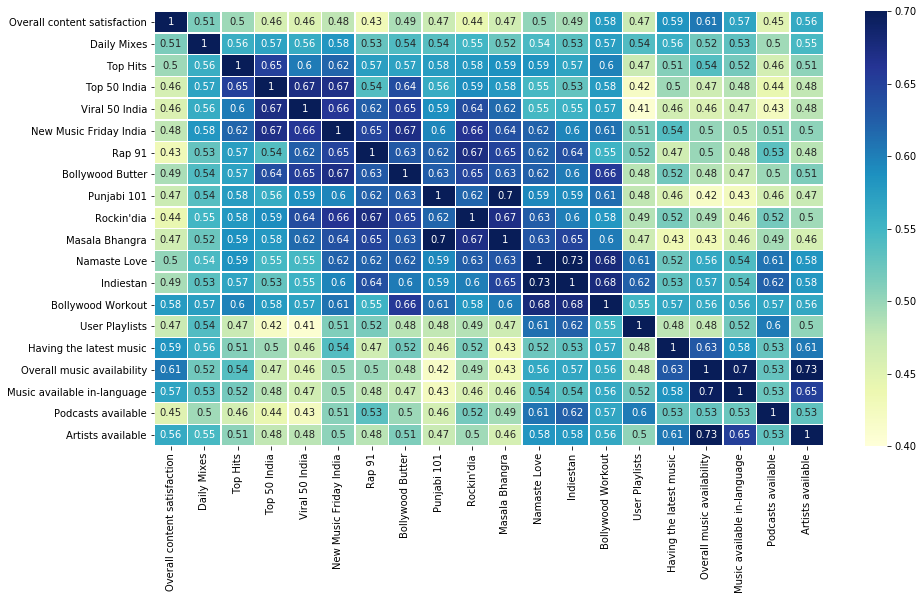

In [42]:
# correlation heatmap for Q13
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

q13_corr = q13_indiaDrivers.corr()
seaborn.heatmap(q13_corr, cmap="YlGnBu",vmin=.4, vmax=.7,annot=True,xticklabels=q13_corr.columns,yticklabels=q13_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(15,8)

In [43]:
q13_corr.to_csv('Q13_correlations.csv', index=True)
q13_corr

Overall content satisfaction  Daily Mixes  \
Overall content satisfaction                      1.000000     0.513900   
Daily Mixes                                       0.513900     1.000000   
Top Hits                                          0.496611     0.557512   
Top 50 India                                      0.461450     0.569646   
Viral 50 India                                    0.455180     0.559656   
New Music Friday India                            0.479140     0.582450   
Rap 91                                            0.431103     0.528662   
Bollywood Butter                                  0.489182     0.540647   
Punjabi 101                                       0.471247     0.536688   
Rockin'dia                                        0.441981     0.549340   
Masala Bhangra                                    0.466327     0.524637   
Namaste Love                                      0.502161     0.544970   
Indiestan                                         0.491185     0.533652   
Bollywood Workout                                 0.577470     0.573716   
User Playlists                                    0.471524     0.540471   
Having the latest music                           0.585025     0.557743   
Overall music availability                        0.605884     0.521871   
Music available in-language                       0.568087     0.531480   
Podcasts available                                0.452114     0.495736   
Artists available                                 0.562725     0.545695   

                              Top Hits  Top 50 India  Viral 50 India  \
Overall content satisfaction  0.496611      0.461450        0.455180   
Daily Mixes                   0.557512      0.569646        0.559656   
Top Hits                      1.000000      0.651917        0.603829   
Top 50 India                  0.651917      1.000000        0.672706   
Viral 50 India                0.603829      0.672706        1.000000   
New Music Friday India        0.620288      0.670104        0.661095   
Rap 91                        0.573961      0.538954        0.623886   
Bollywood Butter              0.571078      0.639457        0.654224   
Punjabi 101                   0.576620      0.559897        0.588639   
Rockin'dia                    0.580303      0.590913        0.640841   
Masala Bhangra                0.586858      0.579860        0.615733   
Namaste Love                  0.585255      0.546563        0.547291   
Indiestan                     0.568532      0.529151        0.554093   
Bollywood Workout             0.598591      0.577839        0.570107   
User Playlists                0.472428      0.419397        0.407976   
Having the latest music       0.509351      0.496784        0.464759   
Overall music availability    0.537405      0.469112        0.456789   
Music available in-language   0.518592      0.483729        0.465809   
Podcasts available            0.463676      0.441649        0.425363   
Artists available             0.505437      0.478388        0.481143   

                              New Music Friday India    Rap 91  \
Overall content satisfaction                0.479140  0.431103   
Daily Mixes                                 0.582450  0.528662   
Top Hits                                    0.620288  0.573961   
Top 50 India                                0.670104  0.538954   
Viral 50 India                              0.661095  0.623886   
New Music Friday India                      1.000000  0.647852   
Rap 91                                      0.647852  1.000000   
Bollywood Butter                            0.671633  0.630743   
Punjabi 101                                 0.595311  0.623418   
Rockin'dia                                  0.663515  0.673709   
Masala Bhangra                              0.636681  0.649492   
Namaste Love                                0.622066  0.621843   
Indiestan                                   0.596285  0.638010   
Bollywood Workout

In [44]:
# convert 1st party data string to numeric
q13_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q13_indiaDrivers['active_days_last_30d'], errors='coerce')
q13_indiaDrivers['active_days_last_7d'] = pd.to_numeric(q13_indiaDrivers['active_days_last_7d'], errors='coerce')
q13_indiaDrivers['minutes_played'] = pd.to_numeric(q13_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
q13_indiaDrivers_Behavioral = q13_indiaDrivers.loc[(q13_indiaDrivers['active_days_last_30d']>0)]
q13_indiaDrivers_Behavioral.head()

active_days_last_7d  active_days_last_30d  minutes_played  \
339                  5.0                  12.0      665.004883   
340                  0.0                   7.0       82.517350   
341                  2.0                   7.0       92.374517   
342                  6.0                  12.0     1486.898283   
343                  5.0                  18.0     1097.007550   

     Overall content satisfaction  Daily Mixes  Top Hits  Top 50 India  \
339                           5.0          4.0       5.0           5.0   
340                           5.0          5.0       5.0           5.0   
341                           5.0          4.0       4.0           4.0   
342                           5.0          5.0       5.0           5.0   
343                           4.0          4.0       4.0           4.0   

     Viral 50 India  New Music Friday India  Rap 91  Bollywood Butter  \
339             3.0                     5.0     5.0               4.0   
340             5.0                     5.0     NaN               5.0   
341             5.0                     4.0     3.0               4.0   
342             5.0                     5.0     5.0               5.0   
343             4.0                     4.0     4.0               4.0   

     Punjabi 101  Rockin'dia  Masala Bhangra  Namaste Love  Indiestan  \
339          4.0         4.0             5.0           5.0        5.0   
340          5.0         5.0             5.0           NaN        5.0   
341          4.0         4.0             3.0           4.0        3.0   
342          5.0         5.0             5.0           5.0        5.0   
343          4.0         4.0             4.0           4.0        4.0   

     Bollywood Workout  User Playlists  Having the latest music  \
339                4.0             5.0                      5.0   
340                5.0             5.0                      5.0   
341                4.0             4.0                      4.0   
342                5.0             5.0                      5.0   
343                4.0             4.0                      4.0   

     Overall music availability  Music available in-language  \
339                         5.0                          4.0   
340                         5.0                          5.0   
341                         4.0                          4.0   
342                         5.0                          5.0   
343                         4.0                          4.0   

     Podcasts available  Artists available  
339                 5.0                5.0  
340                 NaN                5.0  
341                 4.0                4.0  
342                 5.0                5.0  
343                 4.0                4.0

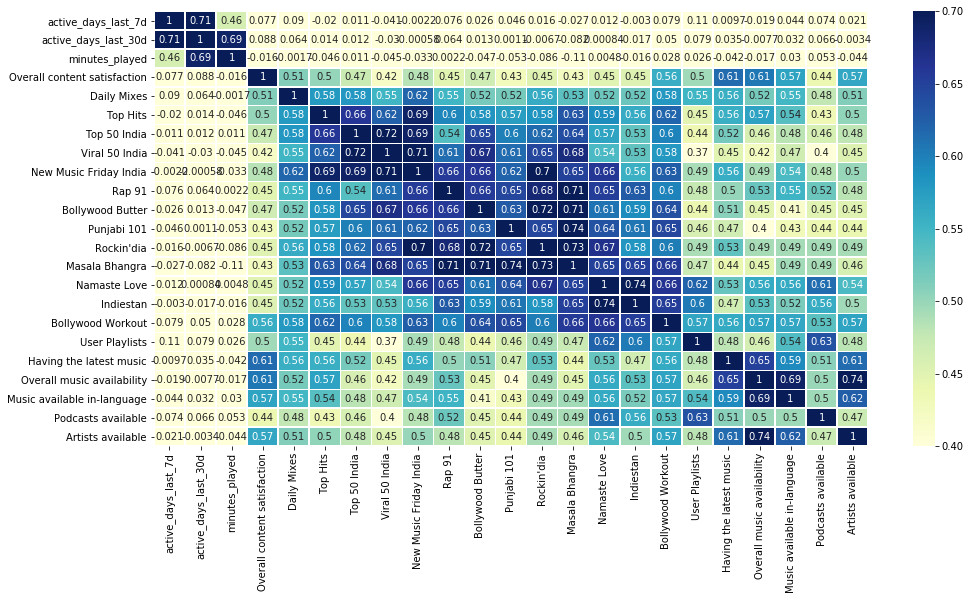

In [45]:
# q13 correlation matrix with 1st party data
corr_2 = q13_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.4, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(16,8)

In [46]:
#Q13 linear regression model

q13_indiaDrivers_Cleaned = q13_indiaDrivers[q13_indiaDrivers.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X = q13_indiaDrivers_Cleaned[['Daily Mixes','Top Hits','Top 50 India','Viral 50 India','New Music Friday India','Rap 91','Bollywood Butter','Punjabi 101',"Rockin'dia",'Masala Bhangra',"Namaste Love","Indiestan","Bollywood Workout","User Playlists","Having the latest music","Overall music availability","Music available in-language","Podcasts available","Artists available"]]
y = q13_indiaDrivers_Cleaned['Overall content satisfaction']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Overall content satisfaction   R-squared:                       0.513
Model:                                      OLS   Adj. R-squared:                  0.484
Method:                           Least Squares   F-statistic:                     17.57
Date:                          Tue, 23 Jul 2019   Prob (F-statistic):           5.94e-39
Time:                                  20:02:35   Log-Likelihood:                -239.39
No. Observations:                           337   AIC:                             518.8
Df Residuals:                               317   BIC:                             595.2
Df Model:                                    19                                         
Covariance Type:                      nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0889      0.198      5.503      0.000       0.700       1.478
Daily Mixes                    -0.0251      0.054     -0.463      0.644      -0.132       0.082
Top Hits                        0.0020      0.051      0.038      0.970      -0.099       0.103
Top 50 India                    0.0025      0.053      0.048      0.962      -0.101       0.106
Viral 50 India                 -0.0053      0.052     -0.102      0.919      -0.108       0.097
New Music Friday India         -0.0130      0.054     -0.243      0.808      -0.118       0.092
Rap 91                          0.0254      0.048      0.532      0.595      -0.068       0.119
Bollywood Butter                0.0670      0.054      1.239      0.216      -0.039       0.173
Punjabi 101                     0.0943      0.047      2.009      0.045       0.002       0.187
Rockin'dia                      0.0403      0.054      0.754      0.452      -0.065       0.146
Masala Bhangra                 -0.0209      0.054     -0.385      0.700      -0.127       0.086
Namaste Love                   -0.0805      0.056     -1.449      0.148      -0.190       0.029
Indiestan                      -0.0096      0.055     -0.175      0.862      -0.118       0.099
Bollywood Workout               0.0636      0.056      1.134      0.258      -0.047       0.174
User Playlists                  0.0651      0.054      1.198      0.232      -0.042       0.172
Having the latest music         0.3394      0.064      5.290      0.000       0.213       0.466
Overall music availability      0.1113      0.064      1.733      0.084      -0.015       0.238
Music available in-language     0.0638      0.059      1.084      0.279      -0.052       0.180
Podcasts available             -0.0244      0.060     -0.408      0.683      -0.142       0.093
Artists available               0.0713      0.061      1.177      0.240      -0.048       0.191
==============================================================================
Omnibus:                       43.077   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.416
Skew:                          -0.685   Prob(JB):                     6.32e-20
Kurtosis:                       5.103   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#re-run model and export to csv 
model = sm.OLS(y, X)
results = model.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
q13_model = pd.read_html(results_as_html, header=0, index_col=0)[0]
q13_model.to_csv('q13_model.csv', index=True)
q13_model

coef  std err      t  P>|t|  [0.025  0.975]
const                        1.0889    0.198  5.503  0.000   0.700   1.478
Daily Mixes                 -0.0251    0.054 -0.463  0.644  -0.132   0.082
Top Hits                     0.0020    0.051  0.038  0.970  -0.099   0.103
Top 50 India                 0.0025    0.053  0.048  0.962  -0.101   0.106
Viral 50 India              -0.0053    0.052 -0.102  0.919  -0.108   0.097
New Music Friday India      -0.0130    0.054 -0.243  0.808  -0.118   0.092
Rap 91                       0.0254    0.048  0.532  0.595  -0.068   0.119
Bollywood Butter             0.0670    0.054  1.239  0.216  -0.039   0.173
Punjabi 101                  0.0943    0.047  2.009  0.045   0.002   0.187
Rockin'dia                   0.0403    0.054  0.754  0.452  -0.065   0.146
Masala Bhangra              -0.0209    0.054 -0.385  0.700  -0.127   0.086
Namaste Love                -0.0805    0.056 -1.449  0.148  -0.190   0.029
Indiestan                   -0.0096    0.055 -0.175  0.862  -0.118   0.099
Bollywood Workout            0.0636    0.056  1.134  0.258  -0.047   0.174
User Playlists               0.0651    0.054  1.198  0.232  -0.042   0.172
Having the latest music      0.3394    0.064  5.290  0.000   0.213   0.466
Overall music availability   0.1113    0.064  1.733  0.084  -0.015   0.238
Music available in-language  0.0638    0.059  1.084  0.279  -0.052   0.180
Podcasts available          -0.0244    0.060 -0.408  0.683  -0.142   0.093
Artists available            0.0713    0.061  1.177  0.240  -0.048   0.191

In [48]:
# create coefficients table for merging with means and creating scatterplot
q13_coefficients = q13_model.iloc[1:,0].reset_index()

# generate q13 means for scatterplot
q13_means = q13_indiaDrivers.mean().reset_index()
q13_means = q13_means.iloc[4:]
q13_means = q13_means.rename(columns={0:'mean'})

In [49]:
q13_binary = q13_indiaDrivers.replace({1:0,2:0,3:0,4:0,5:1})

q13_binary=q13_binary.multiply(weight['weight'], axis=0)

q13_binary_means = q13_binary.mean().reset_index()
q13_binary_means = q13_binary_means.iloc[4:]
q13_binary_means = q13_binary_means.rename(columns={0:'top_box'})
q13_binary_means

index   top_box
4                   Daily Mixes  0.509648
5                      Top Hits  0.463480
6                  Top 50 India  0.494468
7                Viral 50 India  0.458069
8        New Music Friday India  0.458759
9                        Rap 91  0.383882
10             Bollywood Butter  0.427870
11                  Punjabi 101  0.396685
12                   Rockin'dia  0.378873
13               Masala Bhangra  0.365336
14                 Namaste Love  0.438976
15                    Indiestan  0.422312
16            Bollywood Workout  0.441606
17               User Playlists  0.491262
18      Having the latest music  0.598481
19   Overall music availability  0.553179
20  Music available in-language  0.530841
21           Podcasts available  0.459072
22            Artists available  0.554191

In [50]:
q13_scatter = pd.merge(q13_coefficients,q13_binary_means, how='left', on='index')
q13_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q13_indiaDrivers['active_days_last_30d'], errors='coerce')
q13_scatter.to_csv('q13_content_scatter.csv', index=True)
q13_scatter

index    coef   top_box
0                   Daily Mixes -0.0251  0.509648
1                      Top Hits  0.0020  0.463480
2                  Top 50 India  0.0025  0.494468
3                Viral 50 India -0.0053  0.458069
4        New Music Friday India -0.0130  0.458759
5                        Rap 91  0.0254  0.383882
6              Bollywood Butter  0.0670  0.427870
7                   Punjabi 101  0.0943  0.396685
8                    Rockin'dia  0.0403  0.378873
9                Masala Bhangra -0.0209  0.365336
10                 Namaste Love -0.0805  0.438976
11                    Indiestan -0.0096  0.422312
12            Bollywood Workout  0.0636  0.441606
13               User Playlists  0.0651  0.491262
14      Having the latest music  0.3394  0.598481
15   Overall music availability  0.1113  0.553179
16  Music available in-language  0.0638  0.530841
17           Podcasts available -0.0244  0.459072
18            Artists available  0.0713  0.554191

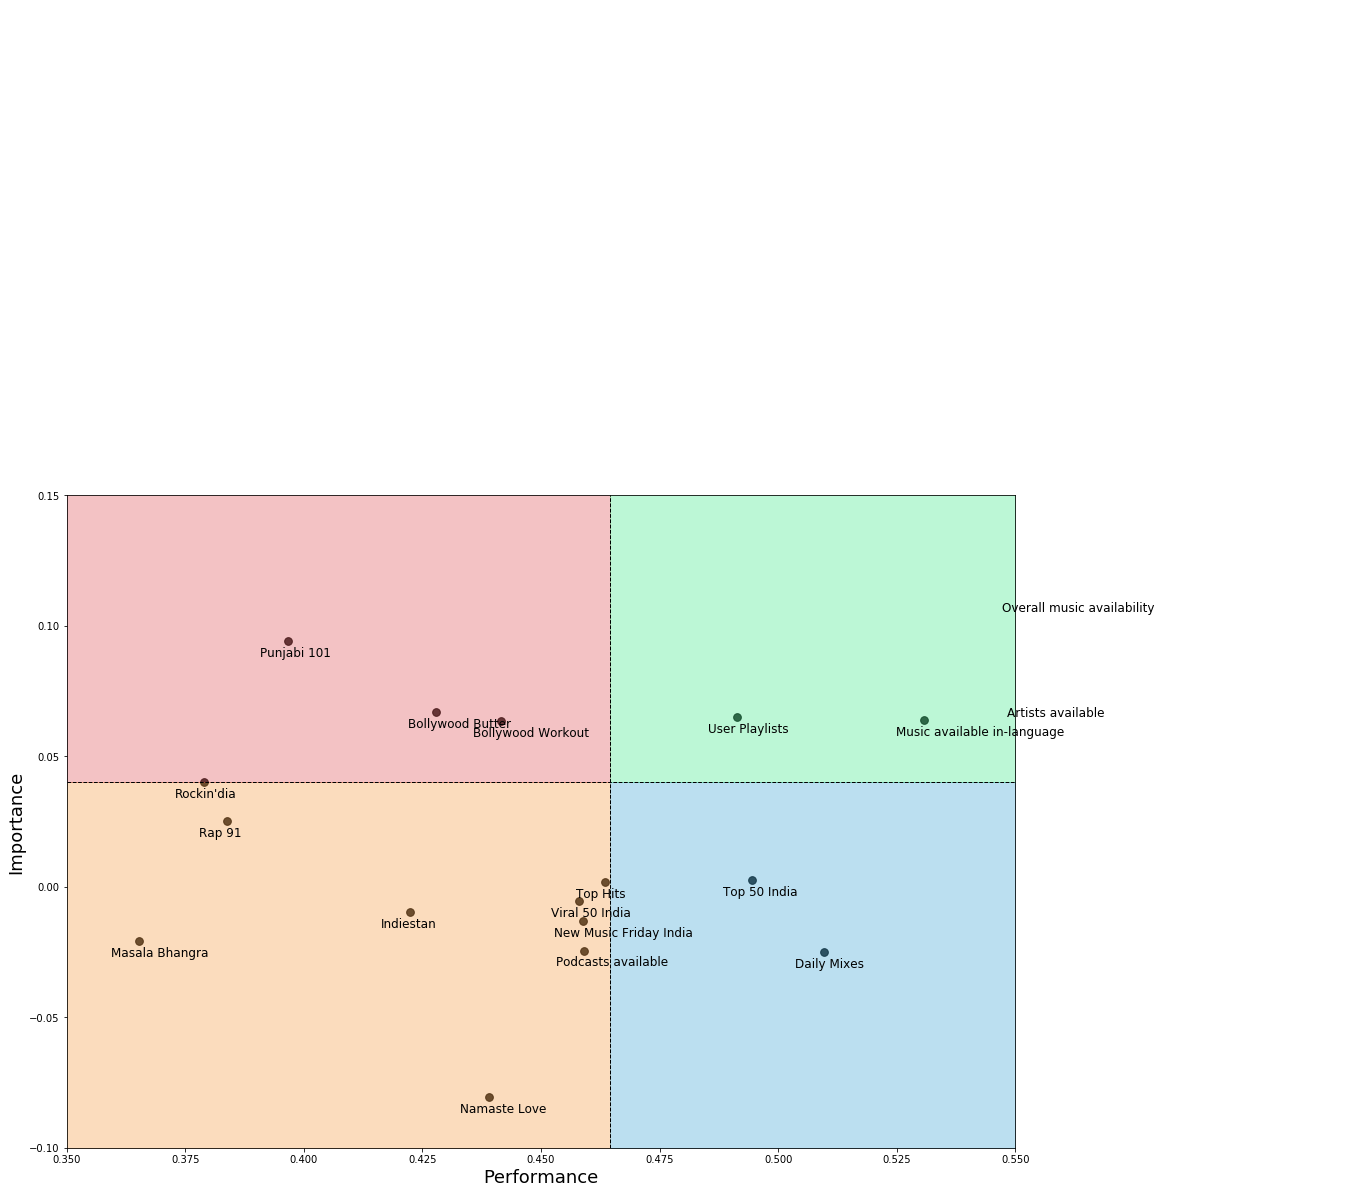

In [51]:
# build scatter plot with labels
y = q13_scatter['coef']
z = q13_scatter['top_box']
n = q13_scatter['index']

#set mean values for colors
mean_coef = q13_scatter['coef'].mean()
mean_top_box = q13_scatter['top_box'].mean()

#set point for horizontal and vertical line quadrants
T_Cutoff = mean_top_box
V_Cutoff = mean_coef

#plots and data labels with a loop
fig, ax = plt.subplots()
ax.scatter(z, y,s=60, c='black',alpha=0.8)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]-.006, y[i]-.006), fontsize=12)

#plot graphics    
ax.set_xlim(.35,.55)
ax.set_ylim(-.1,.15)
plt.xlabel('Performance',fontsize=18)
plt.ylabel('Importance',fontsize=18)
plt.gcf().set_size_inches(17,12)
ax.axvline(T_Cutoff,color = 'black',linestyle='dashed',lw=1)
ax.axhline(V_Cutoff,color = 'black',linestyle='dashed',lw=1)

#quadrant fill

ax.fill_between([.35, T_Cutoff],-0.1,V_Cutoff,alpha=0.3, color='#F38D25')  # orange
ax.fill_between([T_Cutoff, .55], -0.1, V_Cutoff, alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([.35, T_Cutoff], V_Cutoff, .2, alpha=0.3, color='#DA383D')  # red
ax.fill_between([T_Cutoff, .55], V_Cutoff, .2, alpha=0.3, color='#24e679') #green
ax.set_xlim(.35,.55)
ax.set_ylim(-.1,.15)

#save the outfile
plt.savefig('q13_content_drivers.png', transparent=False,dpi=300)

q14 exploration

In [52]:
# isolate Q14 and replace '99' as missing values with nAn
q14_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q14aSatisfactionFeatures','Q14b1SpecificFeatureSat1_1','Q14b1SpecificFeatureSat1_2','Q14b1SpecificFeatureSat1_3','Q14b1SpecificFeatureSat1_4','Q14b1SpecificFeatureSat1_5','Q14b1SpecificFeatureSat1_6','Q14b1SpecificFeatureSat1_7','Q14b1SpecificFeatureSat1_8','Q14b1SpecificFeatureSat1_9','Q14b1SpecificFeatureSat1_10','Q14b2SpecificFeatureSat2_11','Q14b2SpecificFeatureSat2_12','Q14b2SpecificFeatureSat2_13','Q14b2SpecificFeatureSat2_14','Q14b2SpecificFeatureSat2_15','Q14b2SpecificFeatureSat2_16','Q14b2SpecificFeatureSat2_17','Q14b2SpecificFeatureSat2_19','Q14b2SpecificFeatureSat2_20','Q14b2SpecificFeatureSat2_21','Q14b2SpecificFeatureSat2_22','Q14b2SpecificFeatureSat2_23','Q14b2SpecificFeatureSat2_24']]
q14_indiaDrivers = q14_indiaDrivers.replace(99.0, np.NaN)
q14_indiaDrivers.head()



active_days_last_7d active_days_last_30d minutes_played  \
0                                                           
1                                                           
2                                                           
3                                                           
4                                                           

   Q14aSatisfactionFeatures  Q14b1SpecificFeatureSat1_1  \
0                       4.0                         4.0   
1                       4.0                         NaN   
2                       5.0                         5.0   
3                       4.0                         5.0   
4                       5.0                         4.0   

   Q14b1SpecificFeatureSat1_2  Q14b1SpecificFeatureSat1_3  \
0                         5.0                         5.0   
1                         4.0                         4.0   
2                         5.0                         5.0   
3                         5.0                         5.0   
4                         4.0                         4.0   

   Q14b1SpecificFeatureSat1_4  Q14b1SpecificFeatureSat1_5  \
0                         NaN                         NaN   
1                         3.0                         4.0   
2                         5.0                         5.0   
3                         5.0                         5.0   
4                         4.0                         4.0   

   Q14b1SpecificFeatureSat1_6  Q14b1SpecificFeatureSat1_7  \
0                         4.0                         5.0   
1                         4.0                         4.0   
2                         5.0                         5.0   
3                         4.0                         5.0   
4                         3.0                         5.0   

   Q14b1SpecificFeatureSat1_8  Q14b1SpecificFeatureSat1_9  \
0                         5.0                         4.0   
1                         4.0                         4.0   
2                         5.0                         5.0   
3                         5.0                         5.0   
4                         4.0                         NaN   

   Q14b1SpecificFeatureSat1_10  Q14b2SpecificFeatureSat2_11  \
0                          5.0                          NaN   
1                          NaN                          4.0   
2                          5.0                          5.0   
3                          5.0                          4.0   
4                          5.0                          NaN   

   Q14b2SpecificFeatureSat2_12  Q14b2SpecificFeatureSat2_13  \
0                          2.0                          4.0   
1                          NaN                          NaN   
2                          5.0                          5.0   
3                          3.0                          4.0   
4                          NaN                          NaN   

   Q14b2SpecificFeatureSat2_14  Q14b2SpecificFeatureSat2_15  \
0                          4.0                          5.0   
1                          4.0                          4.0   
2                          5.0                          5.0   
3                          5.0                          5.0   
4                          3.0                          NaN   

   Q14b2SpecificFeatureSat2_16  Q14b2SpecificFeatureSat2_17  \
0                          4.0                          4.0   
1                          4.0                          5.0   
2                          5.0                          4.0   
3                          3.0                          2.0   
4                          NaN                          NaN   

   Q14b2SpecificFeatureSat2_19  Q14b2SpecificFeatureSat2_20  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          5.0                          5.0   
3                          NaN              

In [53]:
q14_indiaDrivers = q14_indiaDrivers.rename(columns={'Q14aSatisfactionFeatures': 'Overall feature satisfaction',
                                             'Q14b1SpecificFeatureSat1_1': 'Sharing a song/playlist',
                                             'Q14b1SpecificFeatureSat1_2': 'Searching for tracks',
                                             'Q14b1SpecificFeatureSat1_3': 'Searching for artists',
                                             'Q14b1SpecificFeatureSat1_4': 'Searching in language',
                                             'Q14b1SpecificFeatureSat1_5': 'Searching for movies',
                                             'Q14b1SpecificFeatureSat1_6': 'Searching for actors',
                                             'Q14b1SpecificFeatureSat1_7': 'Save to your Spotify library',
                                             'Q14b1SpecificFeatureSat1_8': 'Follow people, artists, playlists',
                                             'Q14b1SpecificFeatureSat1_9': "Radio stations",
                                             'Q14b1SpecificFeatureSat1_10': 'Create playlists',
                                             'Q14b2SpecificFeatureSat2_11': "Collaborate on playlists",
                                             'Q14b2SpecificFeatureSat2_12': "Lyrics / behind the scenes",
                                             'Q14b2SpecificFeatureSat2_13': "Concerts announcements",
                                             'Q14b2SpecificFeatureSat2_14': "Content recommendations",
                                             'Q14b2SpecificFeatureSat2_15': "Listen on command",
                                             'Q14b2SpecificFeatureSat2_16': "Amount of mobile data used",
                                             'Q14b2SpecificFeatureSat2_17': "Amount of battery life used",
                                             'Q14b2SpecificFeatureSat2_19': "Stream on any device, anytime",
                                             'Q14b2SpecificFeatureSat2_20': "Listen without ads",
                                             'Q14b2SpecificFeatureSat2_21': "Listen offline",
                                             'Q14b2SpecificFeatureSat2_22': "High quality audio",
                                             'Q14b2SpecificFeatureSat2_23': "Number of ads",
                                             'Q14b2SpecificFeatureSat2_24': "Listen for free"})

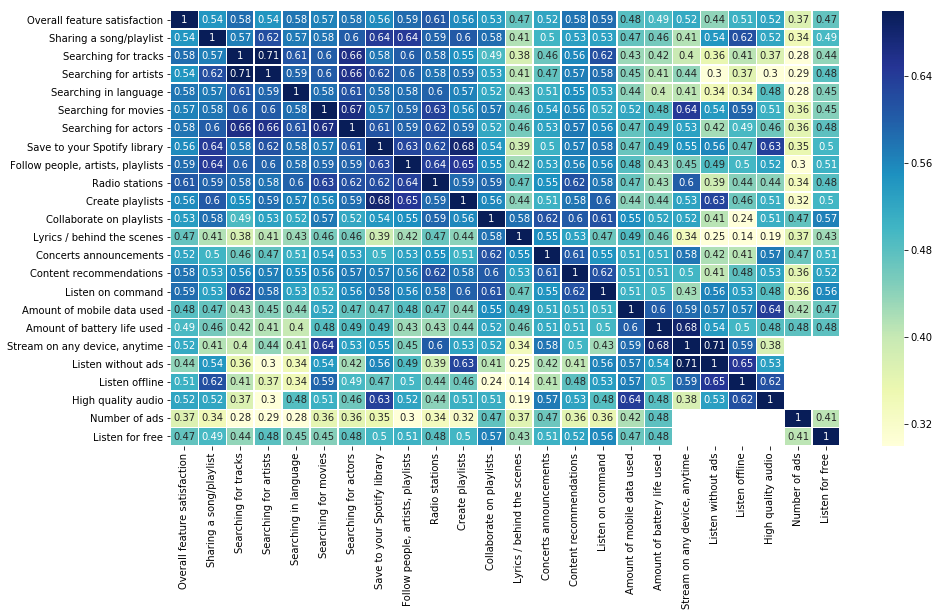

In [54]:
# correlation heatmap for Q14
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

q14_corr = q14_indiaDrivers.corr()
seaborn.heatmap(q14_corr, cmap="YlGnBu",vmin=.3, vmax=.7,annot=True,xticklabels=q14_corr.columns,yticklabels=q14_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(15,8)

In [55]:
q14_corr.to_csv('Q14_correlations.csv', index=True)
q14_corr

Overall feature satisfaction  \
Overall feature satisfaction                           1.000000   
Sharing a song/playlist                                0.543458   
Searching for tracks                                   0.584476   
Searching for artists                                  0.544004   
Searching in language                                  0.577035   
Searching for movies                                   0.565474   
Searching for actors                                   0.578085   
Save to your Spotify library                           0.555394   
Follow people, artists, playlists                      0.587453   
Radio stations                                         0.606908   
Create playlists                                       0.556484   
Collaborate on playlists                               0.534557   
Lyrics / behind the scenes                             0.471462   
Concerts announcements                                 0.522787   
Content recommendations                                0.578828   
Listen on command                                      0.585790   
Amount of mobile data used                             0.481340   
Amount of battery life used                            0.493547   
Stream on any device, anytime                          0.516002   
Listen without ads                                     0.437695   
Listen offline                                         0.507001   
High quality audio                                     0.522784   
Number of ads                                          0.371946   
Listen for free                                        0.472030   

                                   Sharing a song/playlist  \
Overall feature satisfaction                      0.543458   
Sharing a song/playlist                           1.000000   
Searching for tracks                              0.567627   
Searching for artists                             0.618930   
Searching in language                             0.572905   
Searching for movies                              0.576573   
Searching for actors                              0.601710   
Save to your Spotify library                      0.641833   
Follow people, artists, playlists                 0.642493   
Radio stations                                    0.594676   
Create playlists                                  0.604811   
Collaborate on playlists                          0.584147   
Lyrics / behind the scenes                        0.414158   
Concerts announcements                            0.501069   
Content recommendations                           0.529760   
Listen on command                                 0.528772   
Amount of mobile data used                        0.471131   
Amount of battery life used                       0.459192   
Stream on any device, anytime                     0.412569   
Listen without ads                                0.541772   
Listen offline                                    0.617037   
High quality audio                                0.520476   
Number of ads                                     0.341804   
Listen for free                                   0.494728   

                                   Searching for tracks  \
Overall feature satisfaction                   0.584476   
Sharing a song/playlist                        0.567627   
Searching for tracks                           1.000000   
Searching for artists                          0.708434   
Searching in language                          0.610715   
Searching for movies                           0.602335   
Searching for actors                           0.661169   
Save to your Spotify library                   0.578013   
Follow people, artists, playlists              0.600245   
Radio stations                                 0.584739   
Create playlists                               0.550119   
Collaborate on playlists                       0.491480   
Lyrics / behind the scenes               

In [56]:
# convert 1st party data string to numeric
q14_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q14_indiaDrivers['active_days_last_30d'], errors='coerce')
q14_indiaDrivers['active_days_last_7d'] = pd.to_numeric(q14_indiaDrivers['active_days_last_7d'], errors='coerce')
q14_indiaDrivers['minutes_played'] = pd.to_numeric(q14_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
q14_indiaDrivers_Behavioral = q14_indiaDrivers.loc[(q14_indiaDrivers['active_days_last_30d']>0)]
q14_indiaDrivers_Behavioral.head()

active_days_last_7d  active_days_last_30d  minutes_played  \
339                  5.0                  12.0      665.004883   
340                  0.0                   7.0       82.517350   
341                  2.0                   7.0       92.374517   
342                  6.0                  12.0     1486.898283   
343                  5.0                  18.0     1097.007550   

     Overall feature satisfaction  Sharing a song/playlist  \
339                           5.0                      5.0   
340                           5.0                      5.0   
341                           5.0                      4.0   
342                           4.0                      5.0   
343                           5.0                      5.0   

     Searching for tracks  Searching for artists  Searching in language  \
339                   4.0                    5.0                    4.0   
340                   5.0                    5.0                    5.0   
341                   4.0                    5.0                    4.0   
342                   5.0                    5.0                    5.0   
343                   5.0                    4.0                    5.0   

     Searching for movies  Searching for actors  Save to your Spotify library  \
339                   4.0                   4.0                           4.0   
340                   5.0                   5.0                           5.0   
341                   4.0                   5.0                           5.0   
342                   5.0                   5.0                           5.0   
343                   5.0                   5.0                           5.0   

     Follow people, artists, playlists  Radio stations  Create playlists  \
339                                5.0             4.0               4.0   
340                                5.0             5.0               5.0   
341                                4.0             5.0               4.0   
342                                5.0             5.0               5.0   
343                                5.0             4.0               5.0   

     Collaborate on playlists  Lyrics / behind the scenes  \
339                       5.0                         4.0   
340                       5.0                         5.0   
341                       5.0                         4.0   
342                       5.0                         5.0   
343                       5.0                         5.0   

     Concerts announcements  Content recommendations  Listen on command  \
339                     5.0                      4.0                4.0   
340                     5.0                      5.0                5.0   
341                     5.0                      5.0                4.0   
342                     5.0                      5.0                5.0   
343                     4.0                      5.0                5.0   

     Amount of mobile data used  Amount of battery life used  \
339                         4.0                          5.0   
340                         5.0                          5.0   
341                         4.0                          5.0   
342                         5.0                          5.0   
343                         5.0                          5.0   

     Stream on any device, anytime  Listen without ads  Listen offline  \
339                            NaN                 NaN             NaN   
340                            NaN                 NaN             NaN   
341                            NaN                 NaN             NaN   
342                            5.0                 5.0             5.0   
343                            NaN                 NaN             NaN   

     High quality audio  Number of ads  Listen for free  
339                 NaN            5.0              4.0  
340                 NaN            5.0              5.0  
341               

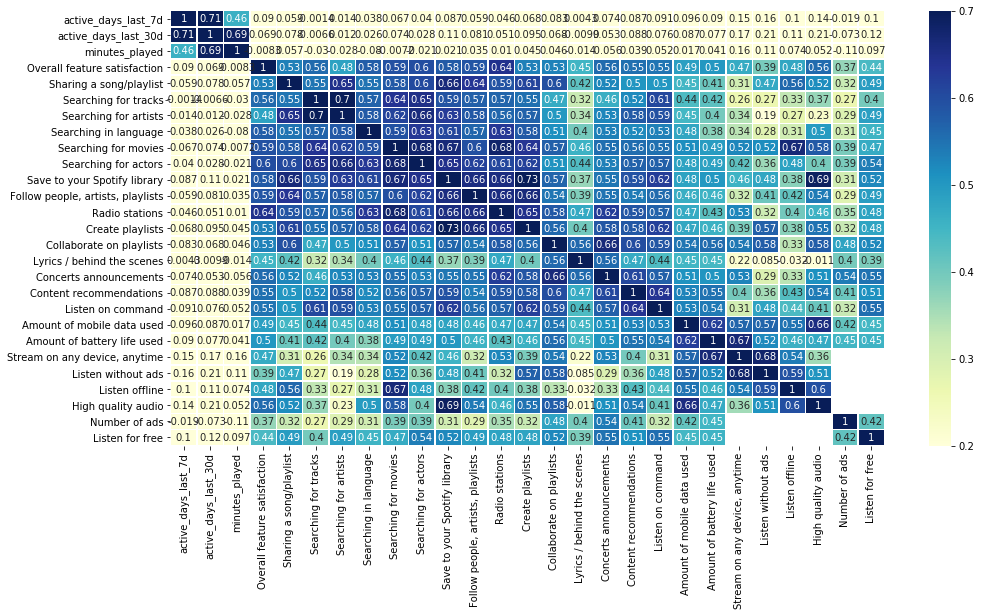

In [57]:
# q14 correlation matrix with 1st party data
corr_2 = q14_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(16,8)

In [58]:
q14_indiaDrivers_Behavioral.describe()

active_days_last_7d  active_days_last_30d  minutes_played  \
count           712.000000            717.000000      708.000000   
mean              2.773876             10.564854     1171.101314   
std               2.342836              8.595198     1988.061658   
min               0.000000              1.000000        0.044833   
25%               1.000000              3.000000      126.110483   
50%               2.000000              8.000000      468.335925   
75%               5.000000             16.000000     1327.073275   
max               7.000000             31.000000    21037.509767   

       Overall feature satisfaction  Sharing a song/playlist  \
count                    717.000000               552.000000   
mean                       4.276151                 4.422101   
std                        0.765275                 0.779327   
min                        1.000000                 1.000000   
25%                        4.000000                 4.000000   
50%                        4.000000                 5.000000   
75%                        5.000000                 5.000000   
max                        5.000000                 5.000000   

       Searching for tracks  Searching for artists  Searching in language  \
count            704.000000             703.000000             660.000000   
mean               4.352273               4.413940               4.354545   
std                0.858922               0.811723               0.843647   
min                1.000000               1.000000               1.000000   
25%                4.000000               4.000000               4.000000   
50%                5.000000               5.000000               5.000000   
75%                5.000000               5.000000               5.000000   
max                5.000000               5.000000               5.000000   

       Searching for movies  Searching for actors  \
count            550.000000            556.000000   
mean               4.336364              4.375899   
std                0.812889              0.771610   
min                1.000000              1.000000   
25%                4.000000              4.000000   
50%                5.000000              5.000000   
75%                5.000000              5.000000   
max                5.000000              5.000000   

       Save to your Spotify library  Follow people, artists, playlists  \
count                    672.000000                         638.000000   
mean                       4.437500                           4.391850   
std                        0.775342                           0.796418   
min                        1.000000                           1.000000   
25%                        4.000000                           4.000000   
50%                        5.000000                           5.000000   
75%                        5.000000                           5.000000   
max                        5.000000                           5.000000   

       Radio stations  Create playlists  Collaborate on playlists  \
count      608.000000        644.000000                452.000000   
mean         4.309211          4.468944                  4.311947   
std          0.821728          0.716804                  0.861875   
min          1.000000          1.000000                  1.000000   
25%          4.000000          4.000000                  4.000000   
50%          4.000000          5.000000                  5.000000   
75%          5.000000          5.000000                  5.000000   
max          5.000000          5.000000                  5.000000   

       Lyrics / behind the scenes  Concerts announcements  \
count                  554.000000              437.000000   
mean                     4.207581                4.178490   
std                      1.012694                0.974536   
min                      1.000000                1.000000   
25%                      4.000000                4.

In [59]:
# Q14 linear regression model

# q14_indiaDrivers_Cleaned = q14_indiaDrivers[q14_indiaDrivers.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

#replace missing data with the mean
q14_indiaDrivers_Behavioral['Sharing a song/playlist']=q14_indiaDrivers_Behavioral['Sharing a song/playlist'].fillna((q14_indiaDrivers_Behavioral['Sharing a song/playlist'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Searching for tracks']=q14_indiaDrivers_Behavioral['Searching for tracks'].fillna((q14_indiaDrivers_Behavioral['Searching for tracks'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Searching for artists']=q14_indiaDrivers_Behavioral['Searching for artists'].fillna((q14_indiaDrivers_Behavioral['Searching for artists'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Searching in language']=q14_indiaDrivers_Behavioral['Searching in language'].fillna((q14_indiaDrivers_Behavioral['Searching in language'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Searching for movies']=q14_indiaDrivers_Behavioral['Searching for movies'].fillna((q14_indiaDrivers_Behavioral['Searching for movies'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Searching for actors']=q14_indiaDrivers_Behavioral['Searching for actors'].fillna((q14_indiaDrivers_Behavioral['Searching for actors'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Save to your Spotify library']=q14_indiaDrivers_Behavioral['Save to your Spotify library'].fillna((q14_indiaDrivers_Behavioral['Save to your Spotify library'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Follow people, artists, playlists']=q14_indiaDrivers_Behavioral['Follow people, artists, playlists'].fillna((q14_indiaDrivers_Behavioral['Follow people, artists, playlists'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Radio stations']=q14_indiaDrivers_Behavioral['Radio stations'].fillna((q14_indiaDrivers_Behavioral['Radio stations'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Create playlists']=q14_indiaDrivers_Behavioral['Create playlists'].fillna((q14_indiaDrivers_Behavioral['Searching for artists'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Collaborate on playlists']=q14_indiaDrivers_Behavioral['Collaborate on playlists'].fillna((q14_indiaDrivers_Behavioral['Collaborate on playlists'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Lyrics / behind the scenes']=q14_indiaDrivers_Behavioral['Lyrics / behind the scenes'].fillna((q14_indiaDrivers_Behavioral['Lyrics / behind the scenes'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Concerts announcements']=q14_indiaDrivers_Behavioral['Concerts announcements'].fillna((q14_indiaDrivers_Behavioral['Concerts announcements'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Content recommendations']=q14_indiaDrivers_Behavioral['Content recommendations'].fillna((q14_indiaDrivers_Behavioral['Content recommendations'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Listen on command']=q14_indiaDrivers_Behavioral['Listen on command'].fillna((q14_indiaDrivers_Behavioral['Listen on command'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Amount of mobile data used']=q14_indiaDrivers_Behavioral['Amount of mobile data used'].fillna((q14_indiaDrivers_Behavioral['Amount of mobile data used'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Amount of battery life used']=q14_indiaDrivers_Behavioral['Amount of battery life used'].fillna((q14_indiaDrivers_Behavioral['Amount of battery life used'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Number of ads']=q14_indiaDrivers_Behavioral['Number of ads'].fillna((q14_indiaDrivers_Behavioral['Number of ads'].mean()), inplace=False)
q14_indiaDrivers_Behavioral['Listen for free']=q14_indiaDrivers_Behavioral['Listen for free'].fillna((q14_indiaDrivers_Behavioral['Listen for free'].mean()), inplace=False)

#build regression model
X = q14_indiaDrivers_Behavioral[['Sharing a song/playlist','Searching for tracks','Searching for artists','Searching in language','Searching for movies','Searching for actors','Save to your Spotify library','Follow people, artists, playlists',"Radio stations",'Create playlists',"Collaborate on playlists","Lyrics / behind the scenes","Concerts announcements","Content recommendations","Listen on command","Amount of mobile data used","Amount of battery life used","Number of ads","Listen for free"]]

y = q14_indiaDrivers_Behavioral['Overall feature satisfaction']
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float)).fit()

# model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Overall feature satisfaction   R-squared:                       0.537
Model:                                      OLS   Adj. R-squared:                  0.525
Method:                           Least Squares   F-statistic:                     42.60
Date:                          Tue, 23 Jul 2019   Prob (F-statistic):          4.49e-103
Time:                                  20:02:41   Log-Likelihood:                -548.77
No. Observations:                           717   AIC:                             1138.
Df Residuals:                               697   BIC:                             1229.
Df Model:                                    19                                         
Covariance Type:                      nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.2371      0.170      1.395      0.164      -0.097       0.571
Sharing a song/playlist               0.0695      0.040      1.753      0.080      -0.008       0.147
Searching for tracks                  0.1529      0.036      4.282      0.000       0.083       0.223
Searching for artists                -0.1085      0.040     -2.731      0.006      -0.187      -0.031
Searching in language                 0.1183      0.034      3.461      0.001       0.051       0.185
Searching for movies                  0.0808      0.040      2.020      0.044       0.002       0.159
Searching for actors                  0.0439      0.042      1.051      0.293      -0.038       0.126
Save to your Spotify library          0.0569      0.043      1.338      0.181      -0.027       0.140
Follow people, artists, playlists     0.1135      0.039      2.891      0.004       0.036       0.191
Radio stations                        0.1814      0.039      4.695      0.000       0.106       0.257
Create playlists                     -0.0616      0.045     -1.362      0.174      -0.150       0.027
Collaborate on playlists             -0.0490      0.039     -1.244      0.214      -0.126       0.028
Lyrics / behind the scenes            0.0407      0.027      1.529      0.127      -0.012       0.093
Concerts announcements                0.0159      0.035      0.453      0.651      -0.053       0.085
Content recommendations               0.1020      0.034      3.038      0.002       0.036       0.168
Listen on command                     0.0411      0.035      1.159      0.247      -0.029       0.111
Amount of mobile data used            0.0343      0.030      1.137      0.256      -0.025       0.094
Amount of battery life used           0.0745      0.031      2.372      0.018       0.013       0.136
Number of ads                         0.0263      0.019      1.355      0.176      -0.012       0.064
Listen for free                       0.0093      0.031      0.295      0.768      -0.053       0.071
==============================================================================
Omnibus:                      119.568   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.867
Skew:                          -0.780   Prob(JB):                     1.80e-86
Kurtosis:                       6.284   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#re-run model and export to csv 
model = sm.OLS(y, X)
results = model.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
q14_model = pd.read_html(results_as_html, header=0, index_col=0)[0]
q14_model.to_csv('q14_model.csv', index=True)
q14_model



coef  std err      t  P>|t|  [0.025  \
const                              0.2371    0.170  1.395  0.164  -0.097   
Sharing a song/playlist            0.0695    0.040  1.753  0.080  -0.008   
Searching for tracks               0.1529    0.036  4.282  0.000   0.083   
Searching for artists             -0.1085    0.040 -2.731  0.006  -0.187   
Searching in language              0.1183    0.034  3.461  0.001   0.051   
Searching for movies               0.0808    0.040  2.020  0.044   0.002   
Searching for actors               0.0439    0.042  1.051  0.293  -0.038   
Save to your Spotify library       0.0569    0.043  1.338  0.181  -0.027   
Follow people, artists, playlists  0.1135    0.039  2.891  0.004   0.036   
Radio stations                     0.1814    0.039  4.695  0.000   0.106   
Create playlists                  -0.0616    0.045 -1.362  0.174  -0.150   
Collaborate on playlists          -0.0490    0.039 -1.244  0.214  -0.126   
Lyrics / behind the scenes         0.0407    0.027  1.529  0.127  -0.012   
Concerts announcements             0.0159    0.035  0.453  0.651  -0.053   
Content recommendations            0.1020    0.034  3.038  0.002   0.036   
Listen on command                  0.0411    0.035  1.159  0.247  -0.029   
Amount of mobile data used         0.0343    0.030  1.137  0.256  -0.025   
Amount of battery life used        0.0745    0.031  2.372  0.018   0.013   
Number of ads                      0.0263    0.019  1.355  0.176  -0.012   
Listen for free                    0.0093    0.031  0.295  0.768  -0.053   

                                   0.975]  
const                               0.571  
Sharing a song/playlist             0.147  
Searching for tracks                0.223  
Searching for artists              -0.031  
Searching in language               0.185  
Searching for movies                0.159  
Searching for actors                0.126  
Save to your Spotify library        0.140  
Follow people, artists, playlists   0.191  
Radio stations                      0.257  
Create playlists                    0.027  
Collaborate on playlists            0.028  
Lyrics / behind the scenes          0.093  
Concerts announcements              0.085  
Content recommendations             0.168  
Listen on command                   0.111  
Amount of mobile data used          0.094  
Amount of battery life used         0.136  
Number of ads                       0.064  
Listen for free                     0.071

In [61]:
# create coefficients table for merging with means and creating scatterplot
q14_coefficients = q14_model.iloc[1:,0].reset_index()

# generate q14 means for scatterplot
q14_means = q14_indiaDrivers.mean().reset_index()
q14_means = q14_means.iloc[4:]
q14_means = q14_means.rename(columns={0:'mean'})

In [62]:
q14_binary = q14_indiaDrivers.replace({1:0,2:0,3:0,4:0,5:1})

q14_binary=q14_binary.multiply(weight['weight'], axis=0)

q14_binary_means = q14_binary.mean().reset_index()
q14_binary_means = q14_binary_means.iloc[4:]
q14_binary_means = q14_binary_means.rename(columns={0:'top_box'})
q14_binary_means

index   top_box
4             Sharing a song/playlist  0.571735
5                Searching for tracks  0.558865
6               Searching for artists  0.581449
7               Searching in language  0.561596
8                Searching for movies  0.533589
9                Searching for actors  0.533437
10       Save to your Spotify library  0.608793
11  Follow people, artists, playlists  0.567947
12                     Radio stations  0.528692
13                   Create playlists  0.588096
14           Collaborate on playlists  0.513940
15         Lyrics / behind the scenes  0.489519
16             Concerts announcements  0.491664
17            Content recommendations  0.536851
18                  Listen on command  0.575988
19         Amount of mobile data used  0.471717
20        Amount of battery life used  0.458104
21      Stream on any device, anytime  0.498944
22                 Listen without ads  0.634340
23                     Listen offline  0.588257
24                 High quality audio  0.568911
25                      Number of ads  0.249596
26                    Listen for free  0.605148

In [63]:
q14_scatter = pd.merge(q14_coefficients,q14_binary_means, how='left', on='index')
q14_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q14_indiaDrivers['active_days_last_30d'], errors='coerce')
q14_scatter.to_csv('q14_features_scatter.csv', index=True)
q14_scatter

index    coef   top_box
0             Sharing a song/playlist  0.0695  0.571735
1                Searching for tracks  0.1529  0.558865
2               Searching for artists -0.1085  0.581449
3               Searching in language  0.1183  0.561596
4                Searching for movies  0.0808  0.533589
5                Searching for actors  0.0439  0.533437
6        Save to your Spotify library  0.0569  0.608793
7   Follow people, artists, playlists  0.1135  0.567947
8                      Radio stations  0.1814  0.528692
9                    Create playlists -0.0616  0.588096
10           Collaborate on playlists -0.0490  0.513940
11         Lyrics / behind the scenes  0.0407  0.489519
12             Concerts announcements  0.0159  0.491664
13            Content recommendations  0.1020  0.536851
14                  Listen on command  0.0411  0.575988
15         Amount of mobile data used  0.0343  0.471717
16        Amount of battery life used  0.0745  0.458104
17                      Number of ads  0.0263  0.249596
18                    Listen for free  0.0093  0.605148

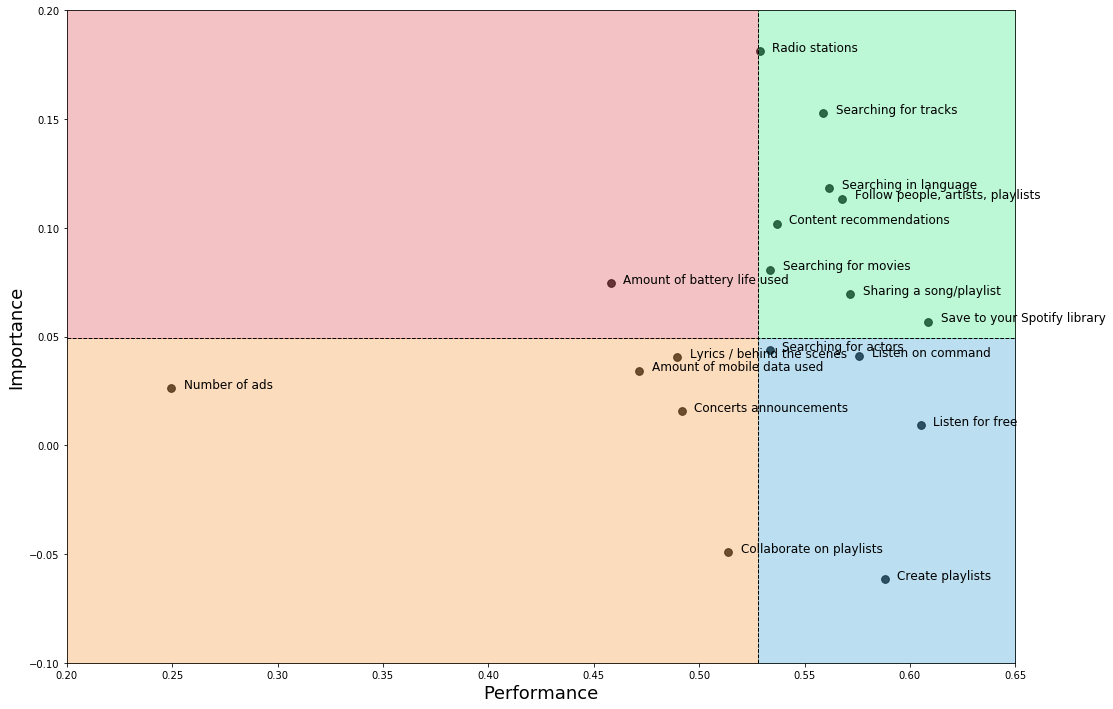

In [64]:
# build scatter plot with labels
y = q14_scatter['coef']
z = q14_scatter['top_box']
n = q14_scatter['index']

#set mean values for colors
mean_coef = q14_scatter['coef'].mean()
mean_top_box = q14_scatter['top_box'].mean()

#set point for horizontal and vertical line quadrants
T_Cutoff = mean_top_box
V_Cutoff = mean_coef

#plots and data labels with a loop
fig, ax = plt.subplots()
ax.scatter(z, y,s=60, c='black',alpha=0.8)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.006, y[i]-.000), fontsize=12)

#plot graphics    
ax.set_xlim(.35,.55)
ax.set_ylim(-.1,.15)
plt.xlabel('Performance',fontsize=18)
plt.ylabel('Importance',fontsize=18)
plt.gcf().set_size_inches(17,12)
ax.axvline(T_Cutoff,color = 'black',linestyle='dashed',lw=1)
ax.axhline(V_Cutoff,color = 'black',linestyle='dashed',lw=1)

#quadrant fill

ax.fill_between([.2, T_Cutoff],-0.1,V_Cutoff,alpha=0.3, color='#F38D25')  # orange
ax.fill_between([T_Cutoff, .65], -0.1, V_Cutoff, alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([.2, T_Cutoff], V_Cutoff, .2, alpha=0.3, color='#DA383D')  # red
ax.fill_between([T_Cutoff, .65], V_Cutoff, .2, alpha=0.3, color='#24e679') #green
ax.set_xlim(.2,.65)
ax.set_ylim(-.1,.2)

#save the outfile
plt.savefig('q14_feature_drivers.png', transparent=False,dpi=300)

In [65]:
q8_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q8aBrandAffinity','Q8bOverallSatisfaction','Q8cSatisfactionPlatforms1','Q8cSatisfactionPlatforms2','Q8cSatisfactionPlatforms3','Q8cSatisfactionPlatforms4','Q8cSatisfactionPlatforms5','Q8cSatisfactionPlatforms6','Q8cSatisfactionPlatforms7','Q8cSatisfactionPlatforms8']]
q8_indiaDrivers.head()

active_days_last_7d active_days_last_30d minutes_played  Q8aBrandAffinity  \
0                                                                       4.0   
1                                                                       4.0   
2                                                                       3.0   
3                                                                       5.0   
4                                                                       5.0   

   Q8bOverallSatisfaction  Q8cSatisfactionPlatforms1  \
0                     4.0                        4.0   
1                     4.0                        NaN   
2                     2.0                        NaN   
3                     5.0                        NaN   
4                     5.0                        NaN   

   Q8cSatisfactionPlatforms2  Q8cSatisfactionPlatforms3  \
0                        NaN                        NaN   
1                        NaN                        5.0   
2                        NaN                        4.0   
3                        NaN                        5.0   
4                        5.0                        5.0   

   Q8cSatisfactionPlatforms4  Q8cSatisfactionPlatforms5  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   Q8cSatisfactionPlatforms6  Q8cSatisfactionPlatforms7  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   Q8cSatisfactionPlatforms8  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

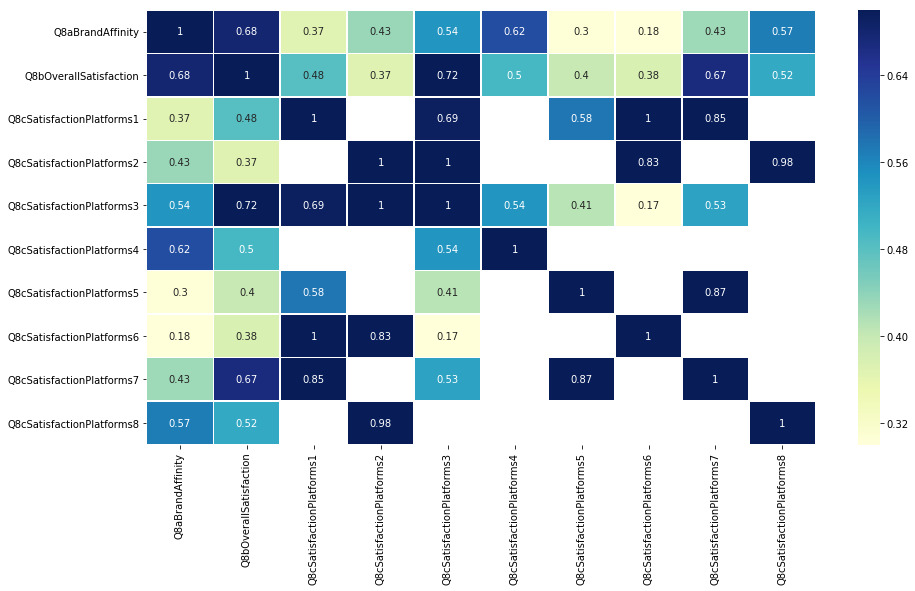

In [66]:
# correlation heatmap for Q8
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

q8_corr = q8_indiaDrivers.corr()
seaborn.heatmap(q8_corr, cmap="YlGnBu",vmin=.3, vmax=.7,annot=True,xticklabels=q8_corr.columns,yticklabels=q8_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(15,8)

In [67]:
q8_corr.to_csv('Q8_correlations.csv', index=True)
q8_corr

Q8aBrandAffinity  Q8bOverallSatisfaction  \
Q8aBrandAffinity                   1.000000                0.678191   
Q8bOverallSatisfaction             0.678191                1.000000   
Q8cSatisfactionPlatforms1          0.365672                0.481485   
Q8cSatisfactionPlatforms2          0.432438                0.369149   
Q8cSatisfactionPlatforms3          0.542344                0.719589   
Q8cSatisfactionPlatforms4          0.620174                0.496609   
Q8cSatisfactionPlatforms5          0.304652                0.399653   
Q8cSatisfactionPlatforms6          0.177359                0.377595   
Q8cSatisfactionPlatforms7          0.428778                0.668202   
Q8cSatisfactionPlatforms8          0.568752                0.518745   

                           Q8cSatisfactionPlatforms1  \
Q8aBrandAffinity                            0.365672   
Q8bOverallSatisfaction                      0.481485   
Q8cSatisfactionPlatforms1                   1.000000   
Q8cSatisfactionPlatforms2                        NaN   
Q8cSatisfactionPlatforms3                   0.692525   
Q8cSatisfactionPlatforms4                        NaN   
Q8cSatisfactionPlatforms5                   0.577350   
Q8cSatisfactionPlatforms6                   1.000000   
Q8cSatisfactionPlatforms7                   0.845154   
Q8cSatisfactionPlatforms8                        NaN   

                           Q8cSatisfactionPlatforms2  \
Q8aBrandAffinity                            0.432438   
Q8bOverallSatisfaction                      0.369149   
Q8cSatisfactionPlatforms1                        NaN   
Q8cSatisfactionPlatforms2                   1.000000   
Q8cSatisfactionPlatforms3                   1.000000   
Q8cSatisfactionPlatforms4                        NaN   
Q8cSatisfactionPlatforms5                        NaN   
Q8cSatisfactionPlatforms6                   0.833934   
Q8cSatisfactionPlatforms7                        NaN   
Q8cSatisfactionPlatforms8                   0.975214   

                           Q8cSatisfactionPlatforms3  \
Q8aBrandAffinity                            0.542344   
Q8bOverallSatisfaction                      0.719589   
Q8cSatisfactionPlatforms1                   0.692525   
Q8cSatisfactionPlatforms2                   1.000000   
Q8cSatisfactionPlatforms3                   1.000000   
Q8cSatisfactionPlatforms4                   0.542326   
Q8cSatisfactionPlatforms5                   0.409906   
Q8cSatisfactionPlatforms6                   0.169031   
Q8cSatisfactionPlatforms7                   0.527756   
Q8cSatisfactionPlatforms8                        NaN   

                           Q8cSatisfactionPlatforms4  \
Q8aBrandAffinity                            0.620174   
Q8bOverallSatisfaction                      0.496609   
Q8cSatisfactionPlatforms1                        NaN   
Q8cSatisfactionPlatforms2                        NaN   
Q8cSatisfactionPlatforms3                   0.542326   
Q8cSatisfactionPlatforms4                   1.000000   
Q8cSatisfactionPlatforms5                        NaN   
Q8cSatisfactionPlatforms6                        NaN   
Q8cSatisfactionPlatforms7                        NaN   
Q8cSatisfactionPlatforms8                        NaN   

                           Q8cSatisfactionPlatforms5  \
Q8aBrandAffinity                            0.304652   
Q8bOverallSatisfaction                      0.399653   
Q8cSatisfactionPlatforms1                   0.577350   
Q8cSatisfactionPlatforms2                        NaN   
Q8cSatisfactionPlatforms3                   0.409906   
Q8cSatisfactionPlatforms4                        NaN   
Q8cSatisfactionPlatforms5                   1.000000   
Q8cSatisfactionPlatforms6                        NaN   
Q8cSatisfactionPlatforms7                   0.866025   
Q8cSatisfactionPlatforms8                        NaN   

                           Q8cSatisfactionPlatforms6  \
Q8aBrandAffinity                            0.177359   
Q8bOverallSatisfaction                      0.37

In [68]:
# convert 1st party data string to numeric
q8_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q8_indiaDrivers['active_days_last_30d'], errors='coerce')
q8_indiaDrivers['active_days_last_7d'] = pd.to_numeric(q8_indiaDrivers['active_days_last_7d'], errors='coerce')
q8_indiaDrivers['minutes_played'] = pd.to_numeric(q8_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
q8_indiaDrivers_Behavioral = q8_indiaDrivers.loc[(q8_indiaDrivers['active_days_last_30d']>0)]
q8_indiaDrivers_Behavioral.head()

active_days_last_7d  active_days_last_30d  minutes_played  \
339                  5.0                  12.0      665.004883   
340                  0.0                   7.0       82.517350   
341                  2.0                   7.0       92.374517   
342                  6.0                  12.0     1486.898283   
343                  5.0                  18.0     1097.007550   

     Q8aBrandAffinity  Q8bOverallSatisfaction  Q8cSatisfactionPlatforms1  \
339               5.0                     4.0                        NaN   
340               5.0                     5.0                        NaN   
341               4.0                     4.0                        NaN   
342               5.0                     5.0                        4.0   
343               4.0                     4.0                        4.0   

     Q8cSatisfactionPlatforms2  Q8cSatisfactionPlatforms3  \
339                        NaN                        5.0   
340                        NaN                        5.0   
341                        NaN                        4.0   
342                        NaN                        5.0   
343                        NaN                        NaN   

     Q8cSatisfactionPlatforms4  Q8cSatisfactionPlatforms5  \
339                        NaN                        NaN   
340                        NaN                        NaN   
341                        NaN                        NaN   
342                        NaN                        NaN   
343                        NaN                        4.0   

     Q8cSatisfactionPlatforms6  Q8cSatisfactionPlatforms7  \
339                        NaN                        NaN   
340                        NaN                        NaN   
341                        NaN                        NaN   
342                        NaN                        NaN   
343                        NaN                        NaN   

     Q8cSatisfactionPlatforms8  
339                        NaN  
340                        NaN  
341                        NaN  
342                        NaN  
343                        NaN

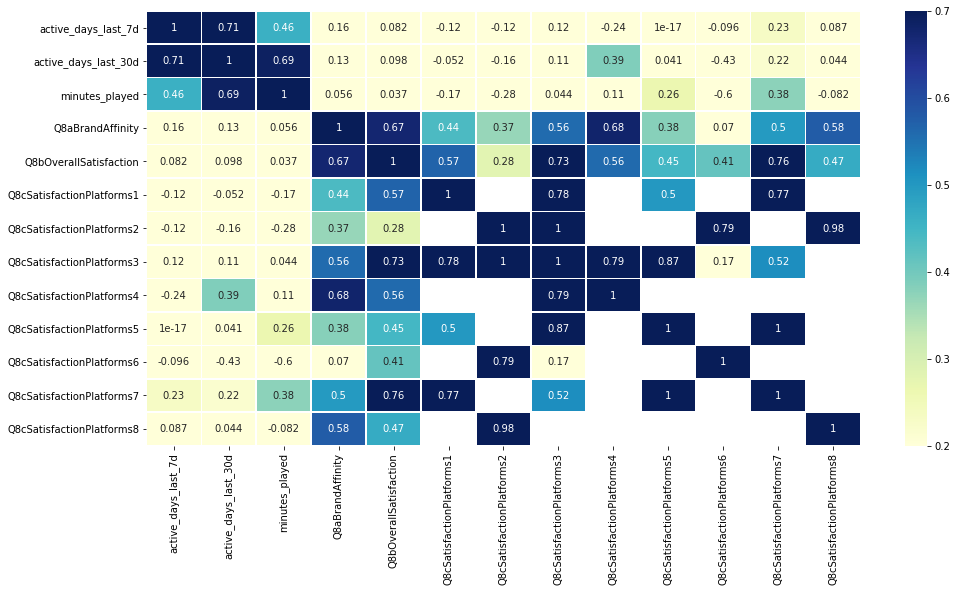

In [69]:
# q8 correlation matrix with 1st party data
corr_2 = q8_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(16,8)

q9 exploration

In [70]:
q9_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q8aBrandAffinity','Q8bOverallSatisfaction','Q9aFeatureAwareness1_1','Q9aFeatureAwareness1_2','Q9aFeatureAwareness1_3','Q9aFeatureAwareness1_4','Q9aFeatureAwareness1_5','Q9aFeatureAwareness1_6','Q9aFeatureAwareness1_7','Q9aFeatureAwareness1_8','Q9aFeatureAwareness1_9','Q9bFeatureAwareness2_10','Q9bFeatureAwareness2_11','Q9bFeatureAwareness2_12','Q9bFeatureAwareness2_13','Q9bFeatureAwareness2_14','Q9bFeatureAwareness2_15','Q9bFeatureAwareness2_16','Q9bFeatureAwareness2_17','Q9bFeatureAwareness2_18']]
q9_indiaDrivers.head()

active_days_last_7d active_days_last_30d minutes_played  Q8aBrandAffinity  \
0                                                                       4.0   
1                                                                       4.0   
2                                                                       3.0   
3                                                                       5.0   
4                                                                       5.0   

   Q8bOverallSatisfaction  Q9aFeatureAwareness1_1  Q9aFeatureAwareness1_2  \
0                     4.0                     2.0                     2.0   
1                     4.0                     5.0                     4.0   
2                     2.0                     5.0                     5.0   
3                     5.0                     5.0                     5.0   
4                     5.0                     5.0                     3.0   

   Q9aFeatureAwareness1_3  Q9aFeatureAwareness1_4  Q9aFeatureAwareness1_5  \
0                     5.0                     5.0                     0.0   
1                     5.0                     4.0                     5.0   
2                     5.0                     5.0                     5.0   
3                     5.0                     5.0                     5.0   
4                     2.0                     5.0                     3.0   

   Q9aFeatureAwareness1_6  Q9aFeatureAwareness1_7  Q9aFeatureAwareness1_8  \
0                     0.0                     1.0                     5.0   
1                     3.0                     5.0                     5.0   
2                     5.0                     5.0                     5.0   
3                     5.0                     5.0                     5.0   
4                     5.0                     5.0                     5.0   

   Q9aFeatureAwareness1_9  Q9bFeatureAwareness2_10  Q9bFeatureAwareness2_11  \
0                     2.0                      4.0                      0.0   
1                     5.0                      3.0                      3.0   
2                     5.0                      5.0                      5.0   
3                     5.0                      4.0                      4.0   
4                     5.0                      0.0                      0.0   

   Q9bFeatureAwareness2_12  Q9bFeatureAwareness2_13  Q9bFeatureAwareness2_14  \
0                      4.0                      4.0                      4.0   
1                      5.0                      5.0                      5.0   
2                      5.0                      5.0                      5.0   
3                      5.0                      5.0                      5.0   
4                      5.0                      3.0                      5.0   

   Q9bFeatureAwareness2_15  Q9bFeatureAwareness2_16  Q9bFeatureAwareness2_17  \
0                      0.0                      3.0                      4.0   
1                      5.0                      4.0                      4.0   
2                      5.0                      1.0                      5.0   
3                      5.0                      5.0                      5.0   
4                      1.0                      5.0                      3.0   

   Q9bFeatureAwareness2_18  
0                      4.0  
1                      2.0  
2                      0.0  
3                      3.0  
4                      4.0

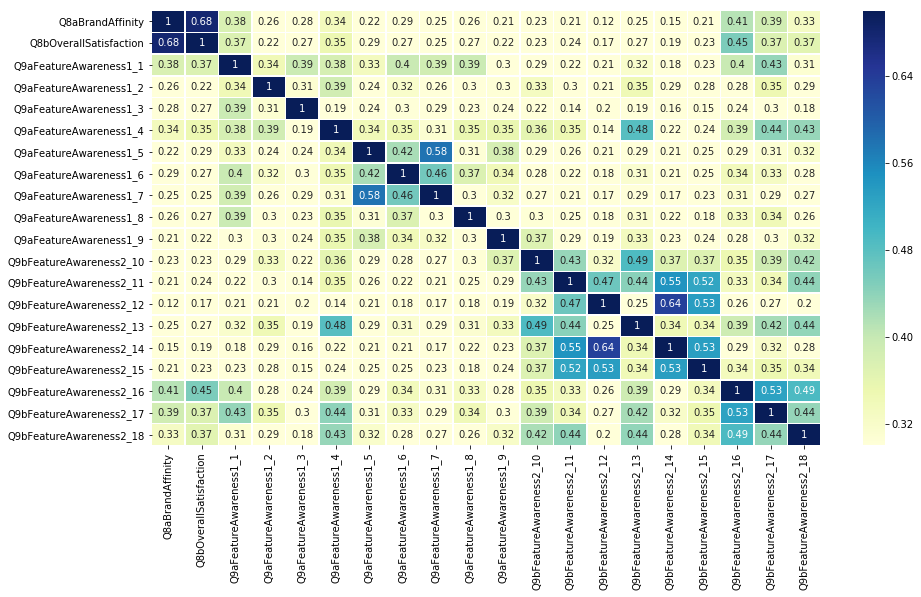

In [71]:
# correlation heatmap for Q9
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

q9_corr = q9_indiaDrivers.corr()
seaborn.heatmap(q9_corr, cmap="YlGnBu",vmin=.3, vmax=.7,annot=True,xticklabels=q9_corr.columns,yticklabels=q9_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(15,8)

In [72]:
q9_corr.to_csv('Q9_correlations.csv', index=True)
q9_corr

Q8aBrandAffinity  Q8bOverallSatisfaction  \
Q8aBrandAffinity                 1.000000                0.678191   
Q8bOverallSatisfaction           0.678191                1.000000   
Q9aFeatureAwareness1_1           0.376651                0.374205   
Q9aFeatureAwareness1_2           0.262717                0.220145   
Q9aFeatureAwareness1_3           0.278969                0.272369   
Q9aFeatureAwareness1_4           0.335177                0.348598   
Q9aFeatureAwareness1_5           0.222754                0.286364   
Q9aFeatureAwareness1_6           0.292881                0.265800   
Q9aFeatureAwareness1_7           0.248965                0.252396   
Q9aFeatureAwareness1_8           0.257134                0.267139   
Q9aFeatureAwareness1_9           0.208223                0.218486   
Q9bFeatureAwareness2_10          0.232491                0.226931   
Q9bFeatureAwareness2_11          0.209756                0.243905   
Q9bFeatureAwareness2_12          0.117683                0.171176   
Q9bFeatureAwareness2_13          0.250547                0.273733   
Q9bFeatureAwareness2_14          0.146973                0.190860   
Q9bFeatureAwareness2_15          0.207322                0.225437   
Q9bFeatureAwareness2_16          0.412346                0.452902   
Q9bFeatureAwareness2_17          0.386666                0.374026   
Q9bFeatureAwareness2_18          0.327559                0.365213   

                         Q9aFeatureAwareness1_1  Q9aFeatureAwareness1_2  \
Q8aBrandAffinity                       0.376651                0.262717   
Q8bOverallSatisfaction                 0.374205                0.220145   
Q9aFeatureAwareness1_1                 1.000000                0.342272   
Q9aFeatureAwareness1_2                 0.342272                1.000000   
Q9aFeatureAwareness1_3                 0.394930                0.310795   
Q9aFeatureAwareness1_4                 0.379752                0.387070   
Q9aFeatureAwareness1_5                 0.334082                0.236072   
Q9aFeatureAwareness1_6                 0.396291                0.317728   
Q9aFeatureAwareness1_7                 0.387361                0.255833   
Q9aFeatureAwareness1_8                 0.394366                0.297342   
Q9aFeatureAwareness1_9                 0.297338                0.303234   
Q9bFeatureAwareness2_10                0.291527                0.329999   
Q9bFeatureAwareness2_11                0.223849                0.295382   
Q9bFeatureAwareness2_12                0.209558                0.208997   
Q9bFeatureAwareness2_13                0.316766                0.345217   
Q9bFeatureAwareness2_14                0.175634                0.292642   
Q9bFeatureAwareness2_15                0.229441                0.280271   
Q9bFeatureAwareness2_16                0.398401                0.278295   
Q9bFeatureAwareness2_17                0.434449                0.347173   
Q9bFeatureAwareness2_18                0.309625                0.294194   

                         Q9aFeatureAwareness1_3  Q9aFeatureAwareness1_4  \
Q8aBrandAffinity                       0.278969                0.335177   
Q8bOverallSatisfaction                 0.272369                0.348598   
Q9aFeatureAwareness1_1                 0.394930                0.379752   
Q9aFeatureAwareness1_2                 0.310795                0.387070   
Q9aFeatureAwareness1_3                 1.000000                0.188631   
Q9aFeatureAwareness1_4                 0.188631                1.000000   
Q9aFeatureAwareness1_5                 0.243660                0.341667   
Q9aFeatureAwareness1_6                 0.302200                0.346887   
Q9aFeatureAwareness1_7                 0.287855                0.309919   
Q9aFeatureAwareness1_8                 0.231874                0.354261   
Q9aFeatureAwareness1_9                 0.236433                0.354490   
Q9bFeatureAwareness2_10                0.218744                0.361253   
Q9bFeatureAwareness2_11 

In [73]:
# convert 1st party data string to numeric
q9_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q9_indiaDrivers['active_days_last_30d'], errors='coerce')
q9_indiaDrivers['active_days_last_7d'] = pd.to_numeric(q9_indiaDrivers['active_days_last_7d'], errors='coerce')
q9_indiaDrivers['minutes_played'] = pd.to_numeric(q9_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
q9_indiaDrivers_Behavioral = q9_indiaDrivers.loc[(q9_indiaDrivers['active_days_last_30d']>0)]
q9_indiaDrivers_Behavioral.head()

active_days_last_7d  active_days_last_30d  minutes_played  \
339                  5.0                  12.0      665.004883   
340                  0.0                   7.0       82.517350   
341                  2.0                   7.0       92.374517   
342                  6.0                  12.0     1486.898283   
343                  5.0                  18.0     1097.007550   

     Q8aBrandAffinity  Q8bOverallSatisfaction  Q9aFeatureAwareness1_1  \
339               5.0                     4.0                     4.0   
340               5.0                     5.0                     5.0   
341               4.0                     4.0                     5.0   
342               5.0                     5.0                     5.0   
343               4.0                     4.0                     4.0   

     Q9aFeatureAwareness1_2  Q9aFeatureAwareness1_3  Q9aFeatureAwareness1_4  \
339                     5.0                     4.0                     3.0   
340                     5.0                     5.0                     5.0   
341                     5.0                     5.0                     5.0   
342                     5.0                     5.0                     5.0   
343                     5.0                     4.0                     4.0   

     Q9aFeatureAwareness1_5  Q9aFeatureAwareness1_6  Q9aFeatureAwareness1_7  \
339                     2.0                     4.0                     5.0   
340                     5.0                     5.0                     5.0   
341                     5.0                     4.0                     4.0   
342                     4.0                     5.0                     5.0   
343                     5.0                     5.0                     4.0   

     Q9aFeatureAwareness1_8  Q9aFeatureAwareness1_9  Q9bFeatureAwareness2_10  \
339                     4.0                     4.0                      5.0   
340                     5.0                     5.0                      1.0   
341                     4.0                     4.0                      4.0   
342                     5.0                     5.0                      5.0   
343                     5.0                     4.0                      5.0   

     Q9bFeatureAwareness2_11  Q9bFeatureAwareness2_12  \
339                      5.0                      4.0   
340                      1.0                      5.0   
341                      4.0                      4.0   
342                      5.0                      5.0   
343                      4.0                      5.0   

     Q9bFeatureAwareness2_13  Q9bFeatureAwareness2_14  \
339                      5.0                      5.0   
340                      5.0                      5.0   
341                      5.0                      4.0   
342                      5.0                      5.0   
343                      4.0                      5.0   

     Q9bFeatureAwareness2_15  Q9bFeatureAwareness2_16  \
339                      5.0                      5.0   
340                      5.0                      5.0   
341                      5.0                      5.0   
342                      5.0                      5.0   
343                      5.0                      5.0   

     Q9bFeatureAwareness2_17  Q9bFeatureAwareness2_18  
339                      5.0                      5.0  
340                      5.0                      5.0  
341                      4.0                      5.0  
342                      5.0                      5.0  
343                      5.0                      4.0

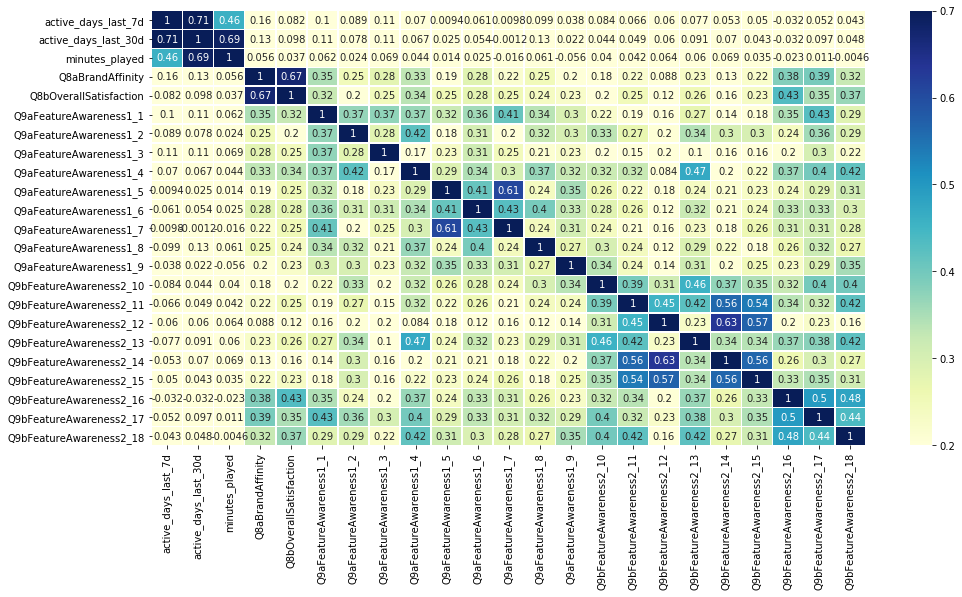

In [74]:
# q9 correlation matrix with 1st party data
corr_2 = q9_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(16,8)

Overall Pillar Drivers Exploration

In [75]:
pillar_indiaDrivers = indiaWorking_df.loc[:,['active_days_last_7d','active_days_last_30d','minutes_played','Q8aBrandAffinity','Q8bOverallSatisfaction','Q8dLikelihoodRecommend','Q11aSatisfactionSignUpActivation','Q12aSatisfactionHomeScreen','Q13aSatisfactionContent','Q14aSatisfactionFeatures']]
pillar_indiaDrivers.head()

active_days_last_7d active_days_last_30d minutes_played  Q8aBrandAffinity  \
0                                                                       4.0   
1                                                                       4.0   
2                                                                       3.0   
3                                                                       5.0   
4                                                                       5.0   

   Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
0                     4.0                     9.0   
1                     4.0                    10.0   
2                     2.0                     2.0   
3                     5.0                     9.0   
4                     5.0                     9.0   

   Q11aSatisfactionSignUpActivation  Q12aSatisfactionHomeScreen  \
0                               3.0                         4.0   
1                               5.0                         4.0   
2                               2.0                         2.0   
3                               4.0                         4.0   
4                               4.0                         3.0   

   Q13aSatisfactionContent  Q14aSatisfactionFeatures  
0                      5.0                       4.0  
1                      4.0                       4.0  
2                      1.0                       5.0  
3                      5.0                       4.0  
4                      5.0                       5.0

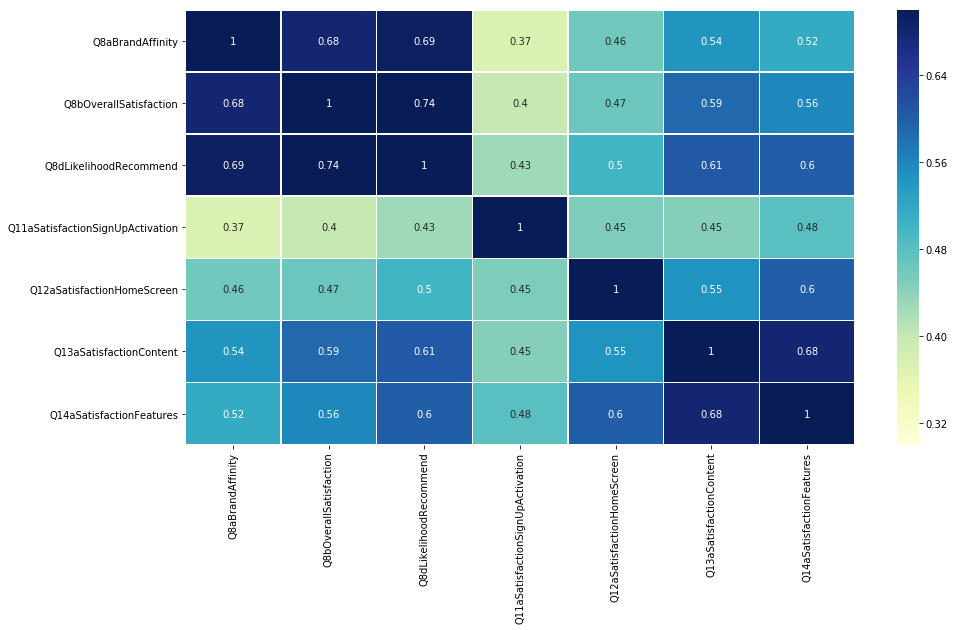

In [76]:
# correlation heatmap for pillar drivers
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

pillar_corr = pillar_indiaDrivers.corr()
seaborn.heatmap(pillar_corr, cmap="YlGnBu",vmin=.3, vmax=.7,annot=True,xticklabels=pillar_corr.columns,yticklabels=pillar_corr.columns, linewidths=.5)
plt.gcf().set_size_inches(15,8)

In [77]:
pillar_corr.to_csv('pillar_correlations.csv', index=True)
pillar_corr

Q8aBrandAffinity  Q8bOverallSatisfaction  \
Q8aBrandAffinity                          1.000000                0.678191   
Q8bOverallSatisfaction                    0.678191                1.000000   
Q8dLikelihoodRecommend                    0.690818                0.738460   
Q11aSatisfactionSignUpActivation          0.373494                0.400149   
Q12aSatisfactionHomeScreen                0.461971                0.465126   
Q13aSatisfactionContent                   0.544720                0.590117   
Q14aSatisfactionFeatures                  0.516432                0.558430   

                                  Q8dLikelihoodRecommend  \
Q8aBrandAffinity                                0.690818   
Q8bOverallSatisfaction                          0.738460   
Q8dLikelihoodRecommend                          1.000000   
Q11aSatisfactionSignUpActivation                0.429437   
Q12aSatisfactionHomeScreen                      0.500839   
Q13aSatisfactionContent                         0.605685   
Q14aSatisfactionFeatures                        0.599937   

                                  Q11aSatisfactionSignUpActivation  \
Q8aBrandAffinity                                          0.373494   
Q8bOverallSatisfaction                                    0.400149   
Q8dLikelihoodRecommend                                    0.429437   
Q11aSatisfactionSignUpActivation                          1.000000   
Q12aSatisfactionHomeScreen                                0.451157   
Q13aSatisfactionContent                                   0.446471   
Q14aSatisfactionFeatures                                  0.480669   

                                  Q12aSatisfactionHomeScreen  \
Q8aBrandAffinity                                    0.461971   
Q8bOverallSatisfaction                              0.465126   
Q8dLikelihoodRecommend                              0.500839   
Q11aSatisfactionSignUpActivation                    0.451157   
Q12aSatisfactionHomeScreen                          1.000000   
Q13aSatisfactionContent                             0.546831   
Q14aSatisfactionFeatures                            0.600983   

                                  Q13aSatisfactionContent  \
Q8aBrandAffinity                                 0.544720   
Q8bOverallSatisfaction                           0.590117   
Q8dLikelihoodRecommend                           0.605685   
Q11aSatisfactionSignUpActivation                 0.446471   
Q12aSatisfactionHomeScreen                       0.546831   
Q13aSatisfactionContent                          1.000000   
Q14aSatisfactionFeatures                         0.681099   

                                  Q14aSatisfactionFeatures  
Q8aBrandAffinity                                  0.516432  
Q8bOverallSatisfaction                            0.558430  
Q8dLikelihoodRecommend                            0.599937  
Q11aSatisfactionSignUpActivation                  0.480669  
Q12aSatisfactionHomeScreen                        0.600983  
Q13aSatisfactionContent                           0.681099  
Q14aSatisfactionFeatures                          1.000000

In [78]:
# convert 1st party data string to numeric
pillar_indiaDrivers['active_days_last_30d'] = pd.to_numeric(pillar_indiaDrivers['active_days_last_30d'], errors='coerce')
pillar_indiaDrivers['active_days_last_7d'] = pd.to_numeric(pillar_indiaDrivers['active_days_last_7d'], errors='coerce')
pillar_indiaDrivers['minutes_played'] = pd.to_numeric(pillar_indiaDrivers['minutes_played'], errors='coerce')


# filter data file to include only people with at least one day active
pillar_indiaDrivers_Behavioral = pillar_indiaDrivers.loc[(pillar_indiaDrivers['active_days_last_30d']>0)]
pillar_indiaDrivers_Behavioral.head()

active_days_last_7d  active_days_last_30d  minutes_played  \
339                  5.0                  12.0      665.004883   
340                  0.0                   7.0       82.517350   
341                  2.0                   7.0       92.374517   
342                  6.0                  12.0     1486.898283   
343                  5.0                  18.0     1097.007550   

     Q8aBrandAffinity  Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
339               5.0                     4.0                     9.0   
340               5.0                     5.0                    10.0   
341               4.0                     4.0                    10.0   
342               5.0                     5.0                    10.0   
343               4.0                     4.0                     9.0   

     Q11aSatisfactionSignUpActivation  Q12aSatisfactionHomeScreen  \
339                               5.0                         5.0   
340                               5.0                         5.0   
341                               5.0                         5.0   
342                               2.0                         5.0   
343                               4.0                         4.0   

     Q13aSatisfactionContent  Q14aSatisfactionFeatures  
339                      5.0                       5.0  
340                      5.0                       5.0  
341                      5.0                       5.0  
342                      5.0                       4.0  
343                      4.0                       5.0

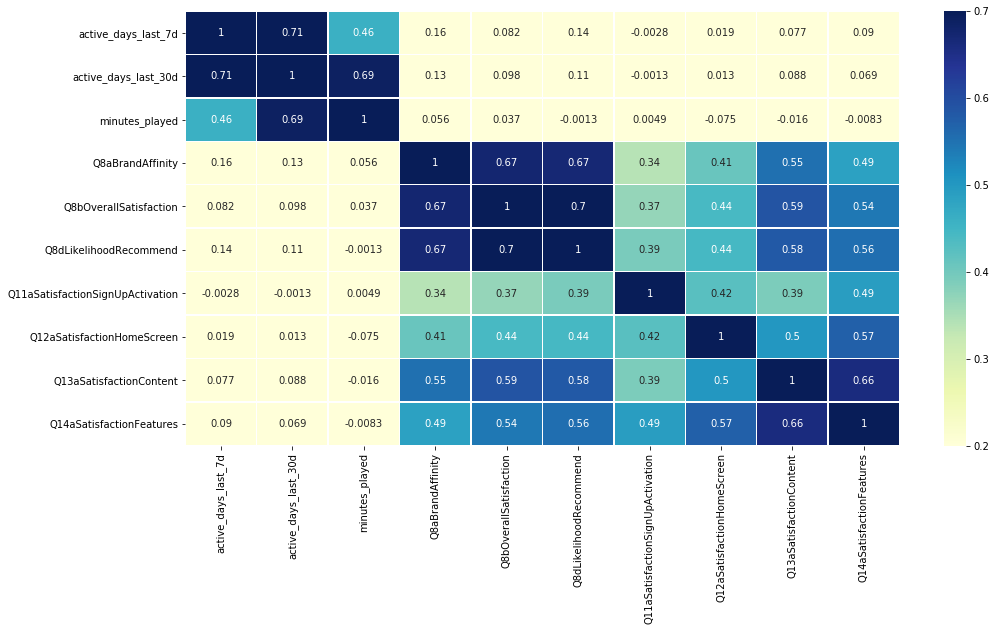

In [79]:
corr_2 = pillar_indiaDrivers_Behavioral.corr()
seaborn.heatmap(corr_2, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(16,8)

In [80]:
#pillar drivers linear regression model

pillar_indiaDrivers_Cleaned = pillar_indiaDrivers[pillar_indiaDrivers.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X = pillar_indiaDrivers_Cleaned[['Q11aSatisfactionSignUpActivation','Q12aSatisfactionHomeScreen','Q13aSatisfactionContent','Q14aSatisfactionFeatures']]
y = pillar_indiaDrivers_Cleaned['Q8aBrandAffinity']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q8aBrandAffinity   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     109.1
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           2.71e-74
Time:                        20:02:48   Log-Likelihood:                -610.04
No. Observations:                 809   AIC:                             1230.
Df Residuals:                     804   BIC:                             1254.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.0086      0.133     15.083      0.000       1.747       2.270
Q11aSatisfactionSignUpActivation     0.0682      0.031      2.225      0.026       0.008       0.128
Q12aSatisfactionHomeScreen           0.0842      0.027      3.079      0.002       0.031       0.138
Q13aSatisfactionContent              0.2982      0.032      9.200      0.000       0.235       0.362
Q14aSatisfactionFeatures             0.1277      0.036      3.589      0.000       0.058       0.198
==============================================================================
Omnibus:                       69.918   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.497
Skew:                          -0.690   Prob(JB):                     4.98e-21
Kurtosis:                       3.931   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#re-run model and export to csv 
model = sm.OLS(y, X)
results = model.fit()
results_summary = results.summary()
results_as_html = results_summary.tables[1].as_html()
pillar_model = pd.read_html(results_as_html, header=0, index_col=0)[0]
pillar_model.to_csv('pillar_model.csv', index=True)
pillar_model

coef  std err       t  P>|t|  [0.025  \
const                             2.0086    0.133  15.083  0.000   1.747   
Q11aSatisfactionSignUpActivation  0.0682    0.031   2.225  0.026   0.008   
Q12aSatisfactionHomeScreen        0.0842    0.027   3.079  0.002   0.031   
Q13aSatisfactionContent           0.2982    0.032   9.200  0.000   0.235   
Q14aSatisfactionFeatures          0.1277    0.036   3.589  0.000   0.058   

                                  0.975]  
const                              2.270  
Q11aSatisfactionSignUpActivation   0.128  
Q12aSatisfactionHomeScreen         0.138  
Q13aSatisfactionContent            0.362  
Q14aSatisfactionFeatures           0.198

In [82]:
# create coefficients table for merging with means and creating scatterplot
pillar_coefficients = pillar_model.iloc[1:,0].reset_index()

# generate pillar means for scatterplot
pillar_means = pillar_indiaDrivers.mean().reset_index()
pillar_means = pillar_means.iloc[4:]
pillar_means = pillar_means.rename(columns={0:'mean'})

In [83]:
pillar_binary = pillar_indiaDrivers.replace({1:0,2:0,3:0,4:0,5:1})

pillar_binary=pillar_binary.multiply(weight['weight'], axis=0)

pillar_binary_means = pillar_binary.mean().reset_index()
pillar_binary_means = pillar_binary_means.iloc[4:]
pillar_binary_means = pillar_binary_means.rename(columns={0:'top_box'})
pillar_binary_means



index   top_box
4            Q8bOverallSatisfaction  0.333016
5            Q8dLikelihoodRecommend  8.560501
6  Q11aSatisfactionSignUpActivation  0.499621
7        Q12aSatisfactionHomeScreen  0.460076
8           Q13aSatisfactionContent  0.498373
9          Q14aSatisfactionFeatures  0.443834

In [84]:
pillar_scatter = pd.merge(pillar_coefficients,pillar_binary_means, how='left', on='index')
pillar_indiaDrivers['active_days_last_30d'] = pd.to_numeric(q13_indiaDrivers['active_days_last_30d'], errors='coerce')
pillar_scatter.to_csv('pillar_scatter.csv', index=True)

In [85]:
#recode values for scatter plot
pillar_scatter['index'].replace('Q11aSatisfactionSignUpActivation', 'Sign Up / Activation',inplace=True)
pillar_scatter['index'].replace('Q12aSatisfactionHomeScreen', 'Home Screen',inplace=True)
pillar_scatter['index'].replace('Q13aSatisfactionContent', 'Content',inplace=True)
pillar_scatter['index'].replace('Q14aSatisfactionFeatures', 'Features',inplace=True)
pillar_scatter


index    coef   top_box
0  Sign Up / Activation  0.0682  0.499621
1           Home Screen  0.0842  0.460076
2               Content  0.2982  0.498373
3              Features  0.1277  0.443834

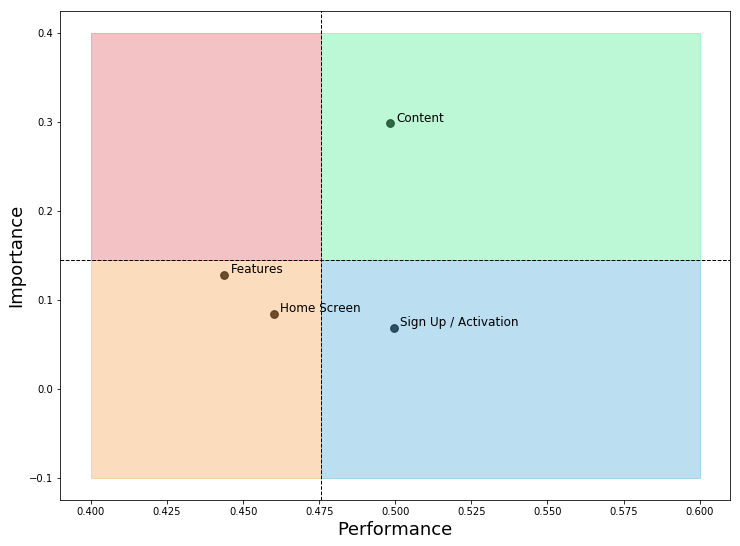

In [86]:
# build scatter plot with labels
y = pillar_scatter['coef']
z = pillar_scatter['top_box']
n = pillar_scatter['index']

#set mean values for colors
mean_coef = pillar_scatter['coef'].mean()
mean_top_box = pillar_scatter['top_box'].mean()

#set point for horizontal and vertical line quadrants
T_Cutoff = mean_top_box
V_Cutoff = mean_coef

#plots and data labels with a loop
fig, ax = plt.subplots()
ax.scatter(z, y,s=60, c='black',alpha=0.8)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.002, y[i]+.002), fontsize=12)

#plot graphics    
plt.xlabel('Performance',fontsize=18)
plt.ylabel('Importance',fontsize=18)
plt.gcf().set_size_inches(12,9)
ax.axvline(T_Cutoff,color = 'black',linestyle='dashed',lw=1)
ax.axhline(V_Cutoff,color = 'black',linestyle='dashed',lw=1)

#quadrant fill
ax.fill_between([.4, T_Cutoff],-0.1,V_Cutoff,alpha=0.3, color='#F38D25')  # orange
ax.fill_between([T_Cutoff, .6], -0.1, V_Cutoff, alpha=0.3, color='#1F98D0')  # blue
ax.fill_between([.4, T_Cutoff], V_Cutoff, .4, alpha=0.3, color='#DA383D')  # red
ax.fill_between([T_Cutoff, .6], V_Cutoff, .4, alpha=0.3, color='#24e679') #green

#save the outfile
plt.savefig('pillar_drivers.png', transparent=False,dpi=300)

In [87]:
pillar_indiaDrivers_Behavioral.groupby('Q8aBrandAffinity').mean()


active_days_last_7d  active_days_last_30d  minutes_played  \
Q8aBrandAffinity                                                              
1.0                          2.000000             10.000000      820.969950   
2.0                          2.600000              5.200000      394.794523   
3.0                          0.894737              5.000000      548.002191   
4.0                          2.479705              9.919414     1126.391121   
5.0                          3.055288             11.303103     1236.508875   

                  Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
Q8aBrandAffinity                                                   
1.0                             1.000000                3.000000   
2.0                             1.600000                2.200000   
3.0                             2.578947                5.368421   
4.0                             3.769231                8.113553   
5.0                             4.503580                9.451074   

                  Q11aSatisfactionSignUpActivation  \
Q8aBrandAffinity                                     
1.0                                       1.000000   
2.0                                       3.600000   
3.0                                       4.000000   
4.0                                       4.190476   
5.0                                       4.587112   

                  Q12aSatisfactionHomeScreen  Q13aSatisfactionContent  \
Q8aBrandAffinity                                                        
1.0                                 3.000000                 2.000000   
2.0                                 2.600000                 1.400000   
3.0                                 3.789474                 3.368421   
4.0                                 3.912088                 3.989011   
5.0                                 4.536993                 4.651551   

                  Q14aSatisfactionFeatures  
Q8aBrandAffinity                            
1.0                               1.000000  
2.0                               1.800000  
3.0                               3.526316  
4.0                               3.978022  
5.0                               4.541766

In [88]:
pillar_indiaDrivers_Behavioral.groupby('Q8aBrandAffinity').count()


active_days_last_7d  active_days_last_30d  minutes_played  \
Q8aBrandAffinity                                                              
1.0                                 1                     1               1   
2.0                                 5                     5               5   
3.0                                19                    19              18   
4.0                               271                   273             266   
5.0                               416                   419             418   

                  Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
Q8aBrandAffinity                                                   
1.0                                    1                       1   
2.0                                    5                       5   
3.0                                   19                      19   
4.0                                  273                     273   
5.0                                  419                     419   

                  Q11aSatisfactionSignUpActivation  \
Q8aBrandAffinity                                     
1.0                                              1   
2.0                                              5   
3.0                                             19   
4.0                                            273   
5.0                                            419   

                  Q12aSatisfactionHomeScreen  Q13aSatisfactionContent  \
Q8aBrandAffinity                                                        
1.0                                        1                        1   
2.0                                        5                        5   
3.0                                       19                       19   
4.0                                      273                      273   
5.0                                      419                      419   

                  Q14aSatisfactionFeatures  
Q8aBrandAffinity                            
1.0                                      1  
2.0                                      5  
3.0                                     19  
4.0                                    273  
5.0                                    419

In [89]:
pillar_indiaDrivers_Behavioral

active_days_last_7d  active_days_last_30d  minutes_played  \
339                   5.0                  12.0      665.004883   
340                   0.0                   7.0       82.517350   
341                   2.0                   7.0       92.374517   
342                   6.0                  12.0     1486.898283   
343                   5.0                  18.0     1097.007550   
344                   0.0                  10.0      247.682767   
345                   5.0                   8.0     1185.590567   
346                   6.0                  11.0      728.952933   
347                   3.0                   7.0      172.053800   
348                   4.0                  11.0      167.385783   
349                   3.0                  12.0      450.437200   
350                   5.0                  19.0      769.001117   
351                   5.0                   7.0      369.501800   
352                   6.0                  11.0     1214.923900   
353                   3.0                   7.0      302.226067   
354                   6.0                  10.0     1656.628733   
355                   0.0                  17.0      849.251950   
356                   4.0                   7.0      958.427683   
357                   2.0                  10.0      339.790417   
358                   6.0                  18.0     1184.111167   
359                   3.0                   8.0      682.011183   
360                   5.0                  12.0      376.727350   
361                   2.0                   8.0      466.781250   
362                   4.0                  10.0      540.549333   
363                   6.0                  19.0      972.659050   
364                   6.0                  10.0      149.803233   
365                   6.0                  17.0      703.603483   
366                   4.0                   7.0       54.061433   
367                   6.0                  18.0     1727.291017   
368                   5.0                  12.0      344.825633   
369                   1.0                   7.0      251.546800   
370                   1.0                  10.0      619.368567   
371                   4.0                  11.0     1010.291717   
372                   6.0                  18.0      403.138483   
373                   1.0                  12.0      427.794017   
374                   0.0                   4.0       15.516733   
375                   0.0                   9.0      446.098517   
376                   2.0                   9.0      442.595867   
377                   0.0                   4.0       69.006800   
378                   0.0                   4.0       13.846000   
379                   5.0                  10.0      851.541850   
380                   0.0                   5.0       88.877467   
381                   2.0                   3.0       53.901767   
382                   0.0                   4.0      156.269167   
383                   5.0                  10.0      636.390467   
384                   1.0                   9.0       43.545750   
385                   2.0                   4.0        6.349300   
386                   0.0                   6.0       20.463933   
387                   2.0                  10.0      493.972050   
388                   6.0                  11.0     1316.016117   
389                   1.0                   6.0       31.597267   
390                   0.0                   5.0       39.058717   
391                   4.0                   8.0      283.519967   
392                   4.0                   4.0       19.872983   
393                   2.0                   6.0      153.883750   
394                   4.0                  10.0      167.752117   
395                   0.0                   8.0      193.677250   
396                   3.0                   9.0      513.518600   
397                   4.0                   4.0      

In [90]:
pillar_indiaDrivers_Behavioral_Cleaned=pillar_indiaDrivers_Behavioral.loc[pillar_indiaDrivers_Behavioral['Q8aBrandAffinity']>1].reset_index()
pillar_indiaDrivers_Behavioral_Cleaned.groupby('Q8aBrandAffinity').mean()



index  active_days_last_7d  active_days_last_30d  \
Q8aBrandAffinity                                                          
2.0               561.600000             2.600000              5.200000   
3.0               768.578947             0.894737              5.000000   
4.0               759.604396             2.479705              9.919414   
5.0               794.658711             3.055288             11.303103   

                  minutes_played  Q8bOverallSatisfaction  \
Q8aBrandAffinity                                           
2.0                   394.794523                1.600000   
3.0                   548.002191                2.578947   
4.0                  1126.391121                3.769231   
5.0                  1236.508875                4.503580   

                  Q8dLikelihoodRecommend  Q11aSatisfactionSignUpActivation  \
Q8aBrandAffinity                                                             
2.0                             2.200000                          3.600000   
3.0                             5.368421                          4.000000   
4.0                             8.113553                          4.190476   
5.0                             9.451074                          4.587112   

                  Q12aSatisfactionHomeScreen  Q13aSatisfactionContent  \
Q8aBrandAffinity                                                        
2.0                                 2.600000                 1.400000   
3.0                                 3.789474                 3.368421   
4.0                                 3.912088                 3.989011   
5.0                                 4.536993                 4.651551   

                  Q14aSatisfactionFeatures  
Q8aBrandAffinity                            
2.0                               1.800000  
3.0                               3.526316  
4.0                               3.978022  
5.0                               4.541766

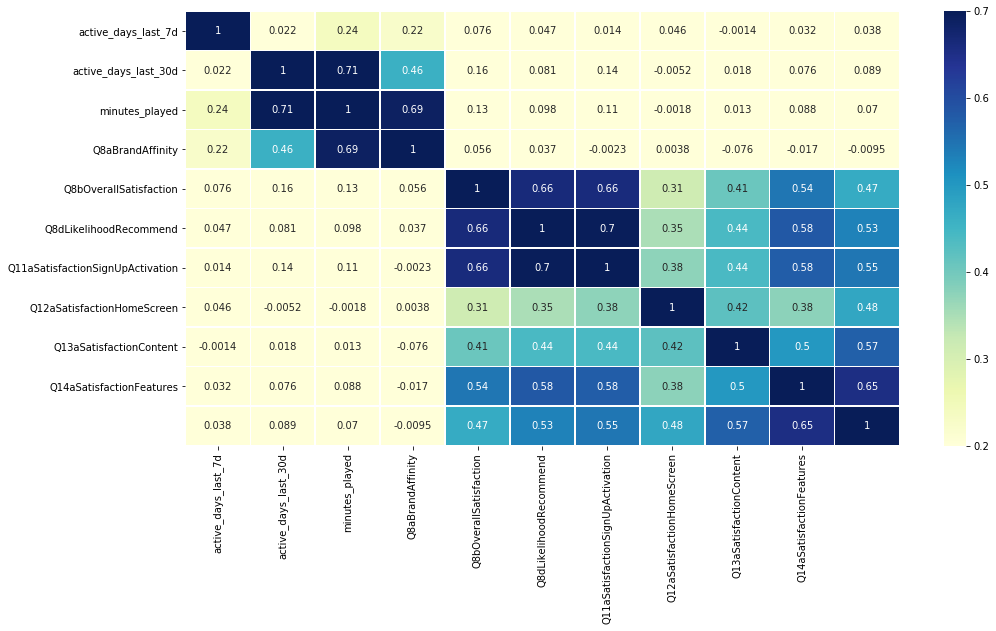

In [91]:
corr_3 = pillar_indiaDrivers_Behavioral_Cleaned.corr()
seaborn.heatmap(corr_3, cmap="YlGnBu",vmin=.2, vmax=.7,annot=True,xticklabels=corr_2.columns,yticklabels=corr_2.columns, linewidths=.5)
plt.gcf().set_size_inches(16,8)

In [92]:
len(pillar_indiaDrivers_Behavioral_Cleaned)

716

In [93]:
pillar_indiaDrivers_Behavioral_Cleaned.describe()

index  active_days_last_7d  active_days_last_30d  minutes_played  \
count   716.000000           711.000000            716.000000      707.000000   
mean    778.973464             2.774965             10.565642     1171.596549   
std     282.183114             2.344305              8.601180     1989.425432   
min     339.000000             0.000000              1.000000        0.044833   
25%     517.750000             1.000000              3.000000      126.063883   
50%     762.500000             2.000000              8.000000      466.781250   
75%    1027.250000             5.000000             16.000000     1329.953283   
max    1284.000000             7.000000             31.000000    21037.509767   

       Q8aBrandAffinity  Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
count        716.000000              716.000000              716.000000   
mean           4.544693                4.152235                8.782123   
std            0.586050                0.729409                1.482773   
min            2.000000                1.000000                0.000000   
25%            4.000000                4.000000                8.000000   
50%            5.000000                4.000000                9.000000   
75%            5.000000                5.000000               10.000000   
max            5.000000                5.000000               10.000000   

       Q11aSatisfactionSignUpActivation  Q12aSatisfactionHomeScreen  \
count                        716.000000                  716.000000   
mean                           4.413408                    4.265363   
std                            0.678987                    0.817279   
min                            1.000000                    1.000000   
25%                            4.000000                    4.000000   
50%                            5.000000                    4.000000   
75%                            5.000000                    5.000000   
max                            5.000000                    5.000000   

       Q13aSatisfactionContent  Q14aSatisfactionFeatures  
count               716.000000                716.000000  
mean                  4.342179                  4.280726  
std                   0.778349                  0.755931  
min                   1.000000                  1.000000  
25%                   4.000000                  4.000000  
50%                   4.000000                  4.000000  
75%                   5.000000                  5.000000  
max                   5.000000                  5.000000

In [94]:
pillar_indiaDrivers_Behavioral_Cleaned['minutes_played_deciles'] = pd.qcut(pillar_indiaDrivers_Behavioral_Cleaned['minutes_played'], 10, labels=False)


In [95]:
pillar_indiaDrivers_Behavioral_Cleaned.tail(10)

index  active_days_last_7d  active_days_last_30d  minutes_played  \
706   1270                  1.0                   2.0      291.292767   
707   1273                  1.0                   5.0      693.813767   
708   1274                  0.0                   6.0       19.824017   
709   1276                  2.0                   5.0      639.355767   
710   1277                  2.0                   9.0      281.311150   
711   1279                  2.0                   3.0      125.966000   
712   1280                  0.0                   1.0      108.792783   
713   1281                  7.0                  31.0     9186.911200   
714   1283                  1.0                  20.0     2122.060733   
715   1284                  7.0                  31.0     2656.867233   

     Q8aBrandAffinity  Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
706               5.0                     5.0                    10.0   
707               5.0                     5.0                    10.0   
708               5.0                     4.0                     9.0   
709               5.0                     4.0                     9.0   
710               4.0                     4.0                     7.0   
711               5.0                     4.0                     9.0   
712               5.0                     3.0                    10.0   
713               5.0                     5.0                     9.0   
714               5.0                     4.0                     9.0   
715               5.0                     4.0                     9.0   

     Q11aSatisfactionSignUpActivation  Q12aSatisfactionHomeScreen  \
706                               5.0                         5.0   
707                               5.0                         4.0   
708                               5.0                         3.0   
709                               3.0                         5.0   
710                               5.0                         4.0   
711                               4.0                         4.0   
712                               5.0                         5.0   
713                               4.0                         4.0   
714                               5.0                         3.0   
715                               4.0                         5.0   

     Q13aSatisfactionContent  Q14aSatisfactionFeatures  minutes_played_deciles  
706                      5.0                       5.0                     4.0  
707                      5.0                       5.0                     5.0  
708                      4.0                       3.0                     0.0  
709                      5.0                       5.0                     5.0  
710                      5.0                       4.0                     3.0  
711                      4.0                       4.0                     2.0  
712                      4.0                       4.0                     2.0  
713                      4.0                       4.0                     9.0  
714                      4.0                       3.0                     8.0  
715                      4.0                       5.0                     8.0

In [96]:
pillar_indiaDrivers_Behavioral_Cleaned.groupby('minutes_played_deciles').mean()


index  active_days_last_7d  active_days_last_30d  \
minutes_played_deciles                                                          
0.0                     648.943662             0.757143              2.084507   
1.0                     686.253521             1.056338              3.183099   
2.0                     690.371429             1.666667              4.800000   
3.0                     761.647887             1.957746              5.985915   
4.0                     717.633803             2.457143              7.521127   
5.0                     753.657143             3.200000              9.471429   
6.0                     797.873239             3.084507             11.901408   
7.0                     867.328571             4.042857             16.014286   
8.0                     890.464789             4.169014             18.971831   
9.0                     938.084507             5.492754             25.577465   

                        minutes_played  Q8aBrandAffinity  \
minutes_played_deciles                                     
0.0                           9.735356          4.309859   
1.0                          48.486366          4.450704   
2.0                         125.225046          4.571429   
3.0                         224.772931          4.549296   
4.0                         367.102527          4.619718   
5.0                         609.145871          4.600000   
6.0                         915.674981          4.661972   
7.0                        1359.252528          4.528571   
8.0                        2183.995647          4.591549   
9.0                        5852.557810          4.633803   

                        Q8bOverallSatisfaction  Q8dLikelihoodRecommend  \
minutes_played_deciles                                                   
0.0                                   3.929577                8.352113   
1.0                                   4.126761                8.619718   
2.0                                   4.128571                8.628571   
3.0                                   4.183099                8.676056   
4.0                                   4.098592                8.985915   
5.0                                   4.142857                8.942857   
6.0                                   4.295775                9.098592   
7.0                                   4.171429                8.800000   
8.0                                   4.211268                8.901408   
9.0                                   4.281690                8.915493   

                        Q11aSatisfactionSignUpActivation  \
minutes_played_deciles                                     
0.0                                             4.352113   
1.0                                             4.521127   
2.0                                             4.428571   
3.0                                             4.436620   
4.0                                             4.366197   
5.0                                             4.442857   
6.0                                             4.422535   
7.0                                             4.442857   
8.0                                             4.380282   
9.0                                             4.422535   

                        Q12aSatisfactionHomeScreen  Q13aSatisfactionContent  \
minutes_played_deciles                                                        
0.0                                       4.295775                 4.253521   
1.0                                       4.281690                 4.338028   
2.0                                       4.242857                 4.242857   
3.0                                       4.352113                 4.408451   
4.0                                       4.169014                 4.352113   
5.0                                       4.271429                 4.371429   
6.0                                       4.253521                 4.408451   
7.0           